# Import Packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from catboost import CatBoostRegressor, Pool
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Table of Contents

1. **Exploration**

   - [Initial Exploration](#Initial-Exploration)
   - [Data Set A](#Data-Set-A)
   - [Data Set B](#Data-Set-B)
   - [Left Join](#Left-Join)
  
  
2. **Columns**

   - [Model](#Model)
   - [Price](#Price)
   - [Year](#Year)
   - [Year, Model, Price](#Year,Model,Price)
   - [Mileage](#Mileage)
   - [State](#State)


3. **Satistical Techniques**

   - [IQR](#IQR)
   - [Catboost Impute](#Catboost)
   - [Model 1](#Model-1)
   - [Model 2](#Model-2)


# Initial-Exploration

# Data-Set-A :

In [2]:
# Please Change To Your Filepath
dfA = pd.read_csv('/Users/angusmclean/Downloads/synthetic_ford_data.csv')

dfA.shape #size of dataset

(110417, 6)

In [3]:
dfA.head() #sample

,Price,Year,Mileage,City,Vin,Model
0,$18021L,2020,22903.0,Fairfield,FBA136F645B6F0A10,FusionHybrid
1,$8953S,2013,92616.0,Collinsville,FB16ABDAA22090741,EscapeFWD
2,$23609D,2017,34523.0,Bloomington,F70109BACF9EFF043,EdgeSEL
3,$13762Q,2017,48969.0,Colorado Springs,F8D81B18338DC83F7,FocusSedan
4,$36324C,2020,17080.0,Olathe,F469E0851D6FC8B21,ExplorerFWD


In [4]:
dfA.info() #Check DataTypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110417 entries, 0 to 110416
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Price    110417 non-null  object 
 1   Year     110417 non-null  int64  
 2   Mileage  109312 non-null  float64
 3   City     110417 non-null  object 
 4   Vin      110417 non-null  object 
 5   Model    110417 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [5]:
dfA.isnull().sum() #Check for null values

Price         0
Year          0
Mileage    1105
City          0
Vin           0
Model         0
dtype: int64

There is a issue with some misisng milage data, we will look at that later.

In [6]:
dfA.describe() # lets have a look at the distribution:

,Year,Mileage
count,110417.000000,1.093120e+05
mean,2016.199507,5.393903e+04
std,3.486181,4.878768e+04
min,2000.000000,-9.999990e+05
25%,2015.000000,2.588375e+04
50%,2017.000000,4.261350e+04
75%,2019.000000,7.700000e+04
max,2021.000000,1.650780e+06


Negative Milage Value is Alarming, Milages Are Very Large.

In [7]:
dfA.duplicated().sum() # Check for duplicates

0

# Data-Set-B :

## Lets take a look at the second dataset

In [8]:
dfB = pd.read_csv('/Users/angusmclean/Downloads/vmlyr_exercise_2022_technical_challenge_20220718/vmlyr_exercise_2022_B.csv')

dfB.shape #size

(110417, 2)

In [9]:
dfB.head() #sample

,State,Vin
0,OH,FFE8DE4910C9BE7F9
1,IN,F4060C76E8B21F539
2,GA,F19F98083045FEC85
3,TX,FA576575C1F1D90DF
4,FL,FEFEE51E64D9C4C2F


In [10]:
dfB.info() #DataType

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110417 entries, 0 to 110416
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   State   110417 non-null  object
 1   Vin     110417 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [11]:
dfB.isnull().sum() #Check for null values

State    0
Vin      0
dtype: int64

In [12]:
dfB.describe() # lets have a look at the distribution:

,State,Vin
count,110417,110417
unique,59,110417
top,TX,FFE8DE4910C9BE7F9
freq,12621,1


In [13]:
dfB.duplicated().sum() # Check for duplicates

0

# Left-Join

In [14]:
#Left Join the two tables:
merged_df = pd.merge(dfA, dfB[['Vin', 'State']], on='Vin', how='left')

In [15]:
merged_df #sample

,Price,Year,Mileage,City,Vin,Model,State
0,$18021L,2020,22903.0,Fairfield,FBA136F645B6F0A10,FusionHybrid,CA
1,$8953S,2013,92616.0,Collinsville,FB16ABDAA22090741,EscapeFWD,IL
2,$23609D,2017,34523.0,Bloomington,F70109BACF9EFF043,EdgeSEL,MN
3,$13762Q,2017,48969.0,Colorado Springs,F8D81B18338DC83F7,FocusSedan,CO
4,$36324C,2020,17080.0,Olathe,F469E0851D6FC8B21,ExplorerFWD,KS
...,...,...,...,...,...,...,...
110412,$53229S,2020,3514.0,Bartow,F7E3634548C2AF622,F-150King,FL
110413,$15768U,2009,109628.0,Phoenix,F3C43B5825806F345,F-1502WD,AZ
110414,$13407K,2018,18158.0,Puyallup,FADCED8151A11C731,FiestaSedan,WA
110415,$12371P,2014,83325.0,Rochester,F572078DCEB318125,Mustang2dr,NY


In [16]:
df = merged_df

In [17]:
df

,Price,Year,Mileage,City,Vin,Model,State
0,$18021L,2020,22903.0,Fairfield,FBA136F645B6F0A10,FusionHybrid,CA
1,$8953S,2013,92616.0,Collinsville,FB16ABDAA22090741,EscapeFWD,IL
2,$23609D,2017,34523.0,Bloomington,F70109BACF9EFF043,EdgeSEL,MN
3,$13762Q,2017,48969.0,Colorado Springs,F8D81B18338DC83F7,FocusSedan,CO
4,$36324C,2020,17080.0,Olathe,F469E0851D6FC8B21,ExplorerFWD,KS
...,...,...,...,...,...,...,...
110412,$53229S,2020,3514.0,Bartow,F7E3634548C2AF622,F-150King,FL
110413,$15768U,2009,109628.0,Phoenix,F3C43B5825806F345,F-1502WD,AZ
110414,$13407K,2018,18158.0,Puyallup,FADCED8151A11C731,FiestaSedan,WA
110415,$12371P,2014,83325.0,Rochester,F572078DCEB318125,Mustang2dr,NY


In [18]:
#Rearange The Columns
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'Vin', 'Model', 'State'], dtype='object')

In [19]:
df = df[['Model', 'Price', 'Year', 'Mileage', 'City', 'State', 'Vin']]

In [20]:
df

,Model,Price,Year,Mileage,City,State,Vin
0,FusionHybrid,$18021L,2020,22903.0,Fairfield,CA,FBA136F645B6F0A10
1,EscapeFWD,$8953S,2013,92616.0,Collinsville,IL,FB16ABDAA22090741
2,EdgeSEL,$23609D,2017,34523.0,Bloomington,MN,F70109BACF9EFF043
3,FocusSedan,$13762Q,2017,48969.0,Colorado Springs,CO,F8D81B18338DC83F7
4,ExplorerFWD,$36324C,2020,17080.0,Olathe,KS,F469E0851D6FC8B21
...,...,...,...,...,...,...,...
110412,F-150King,$53229S,2020,3514.0,Bartow,FL,F7E3634548C2AF622
110413,F-1502WD,$15768U,2009,109628.0,Phoenix,AZ,F3C43B5825806F345
110414,FiestaSedan,$13407K,2018,18158.0,Puyallup,WA,FADCED8151A11C731
110415,Mustang2dr,$12371P,2014,83325.0,Rochester,NY,F572078DCEB318125


# Model :

## Lets start with with Model, then move along the columns:

In [21]:
df['Model'].value_counts()

Model
F-1504WD        14177
Super            7953
FusionSE         6386
F-1502WD         5144
FocusSedan       4637
                ...  
MustangCobra        1
F-150SVT            1
TaurusPolice        1
ExpeditionEL        1
FusionSEL           1
Name: count, Length: 147, dtype: int64

There are obviously similar models: F-1504WD & F-1502WD
It would be wise to think about grouping these later on as 150 is alot

How much does model affect price? average price per model?
Do some models have a higher resale price/more active resale market?

In [22]:
models = df['Model'].value_counts()

In [23]:
# Convert Series to DataFrame
models = models.reset_index()
models.columns = ['Model', 'Count']

In [24]:
models

,Model,Count
0,F-1504WD,14177
1,Super,7953
2,FusionSE,6386
3,F-1502WD,5144
4,FocusSedan,4637
...,...,...
142,MustangCobra,1
143,F-150SVT,1
144,TaurusPolice,1
145,ExpeditionEL,1


In [25]:
# Sort by count
top_models_df = models.sort_values(by='Count', ascending=False).head(20)

In [26]:
top_models_df

,Model,Count
0,F-1504WD,14177
1,Super,7953
2,FusionSE,6386
3,F-1502WD,5144
4,FocusSedan,4637
5,EscapeFWD,4243
6,FocusHatchback,3622
7,ExplorerXLT,3325
8,Escape4WD,3239
9,EdgeSEL,2754


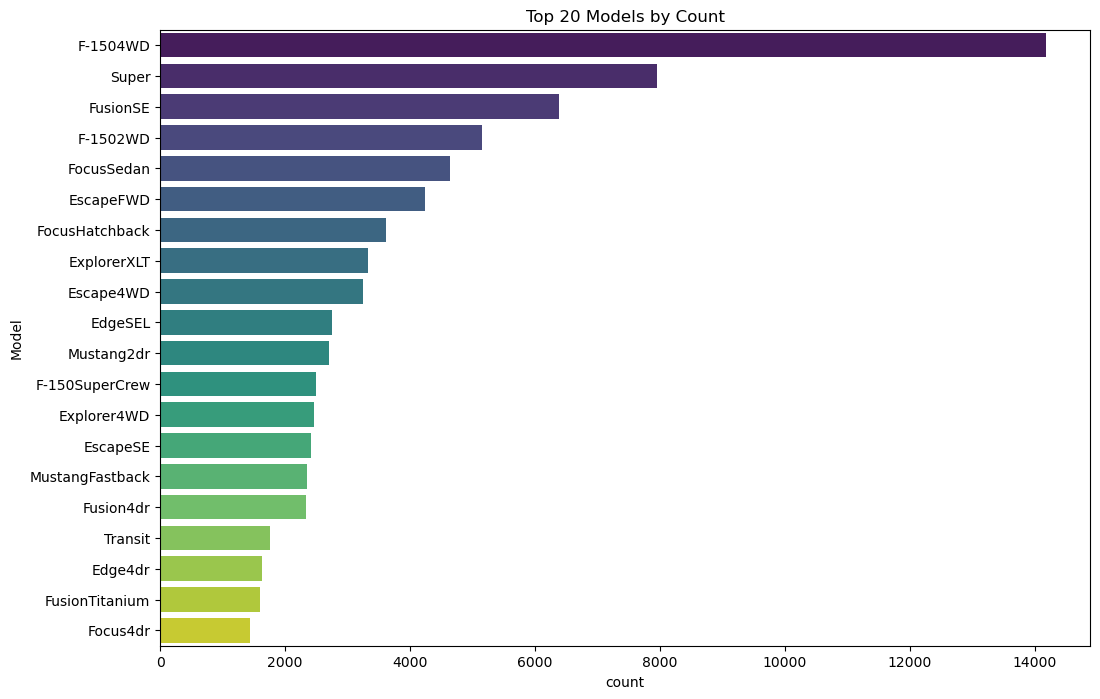

In [27]:
# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Model', data=top_models_df, palette='viridis')
plt.title('Top 20 Models by Count')
plt.xlabel('count')
plt.ylabel('Model')
plt.show()

### Lets take a look at the 150 :

In [28]:
F150_filter = df[df['Model'].str.contains('F-150')]

In [29]:
F150_filter

,Model,Price,Year,Mileage,City,State,Vin
8,F-1504WD,$54510G,2019,5805.0,Manahawkin,NJ,F3DC38CC52BB6B965
12,F-1502WD,$12140T,2014,61634.0,Salisbury,MA,F741B649272643F67
13,F-1502WD,$26851P,2018,40846.0,Greensboro,NC,F7C63D9C4B232EA70
14,F-1502WD,$7428E,2004,180000.0,Houston,TX,F34439D0976DFC704
21,F-1504WD,$34096P,2017,22530.0,Oconomowoc,WI,F455EA181BF5450F7
...,...,...,...,...,...,...,...
110405,F-150SuperCrew,$30200G,2016,50498.0,Ardmore,OK,F97DF7711B6AA5688
110410,F-1504WD,$34542U,2017,49400.0,Fairbanks,AK,F894B0A9C79B29394
110412,F-150King,$53229S,2020,3514.0,Bartow,FL,F7E3634548C2AF622
110413,F-1502WD,$15768U,2009,109628.0,Phoenix,AZ,F3C43B5825806F345


In [30]:
F150_Models = F150_filter['Model'].value_counts()

In [31]:
F150_Models

Model
F-1504WD          14177
F-1502WD           5144
F-150SuperCrew     2495
F-150XLT           1081
F-150SuperCab       512
F-150Lariat         270
F-150XL             220
F-150Regular        152
F-150Platinum       120
F-150                77
F-150Raptor          65
F-150AWD             62
F-150Limited         50
F-150King            25
F-150FX4              4
F-150SVT              1
F-150'07              1
F-1502010             1
Name: count, dtype: int64

In [32]:
F150_Models = F150_Models.reset_index()

In [33]:
F150_Models

,Model,count
0,F-1504WD,14177
1,F-1502WD,5144
2,F-150SuperCrew,2495
3,F-150XLT,1081
4,F-150SuperCab,512
5,F-150Lariat,270
6,F-150XL,220
7,F-150Regular,152
8,F-150Platinum,120
9,F-150,77


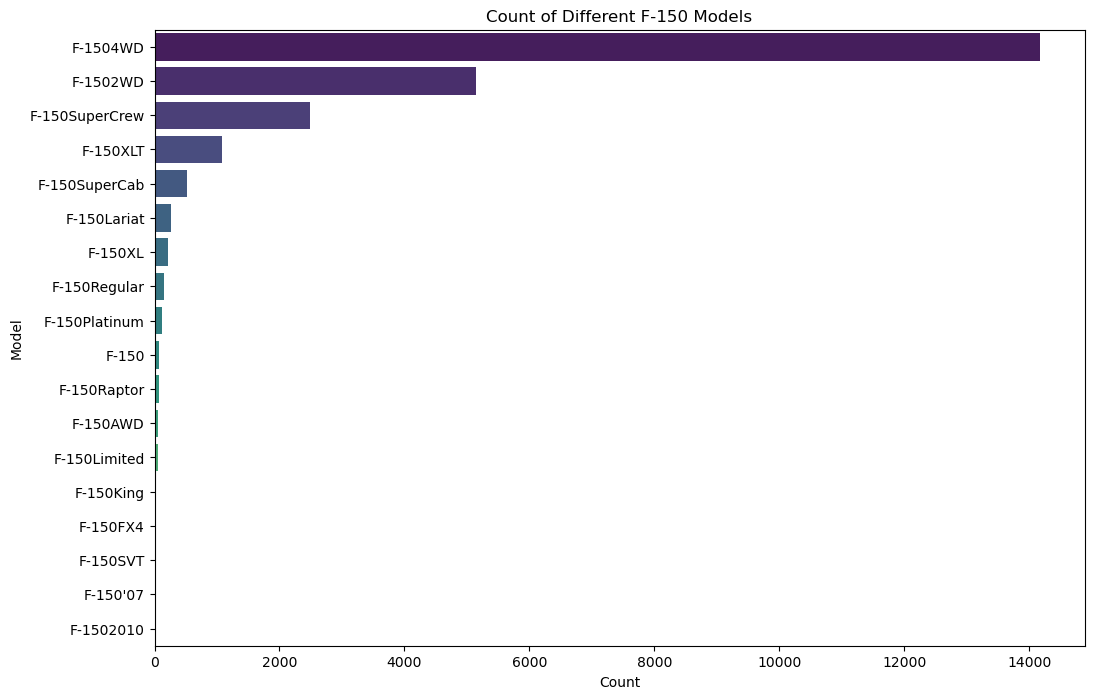

In [34]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='Model', data=F150_Models, palette='viridis')
plt.title('Count of Different F-150 Models')
plt.xlabel('Count')
plt.ylabel('Model')
plt.show()

In [35]:
top_5_F150 = F150_Models.sort_values(by='count', ascending=False).head(5)

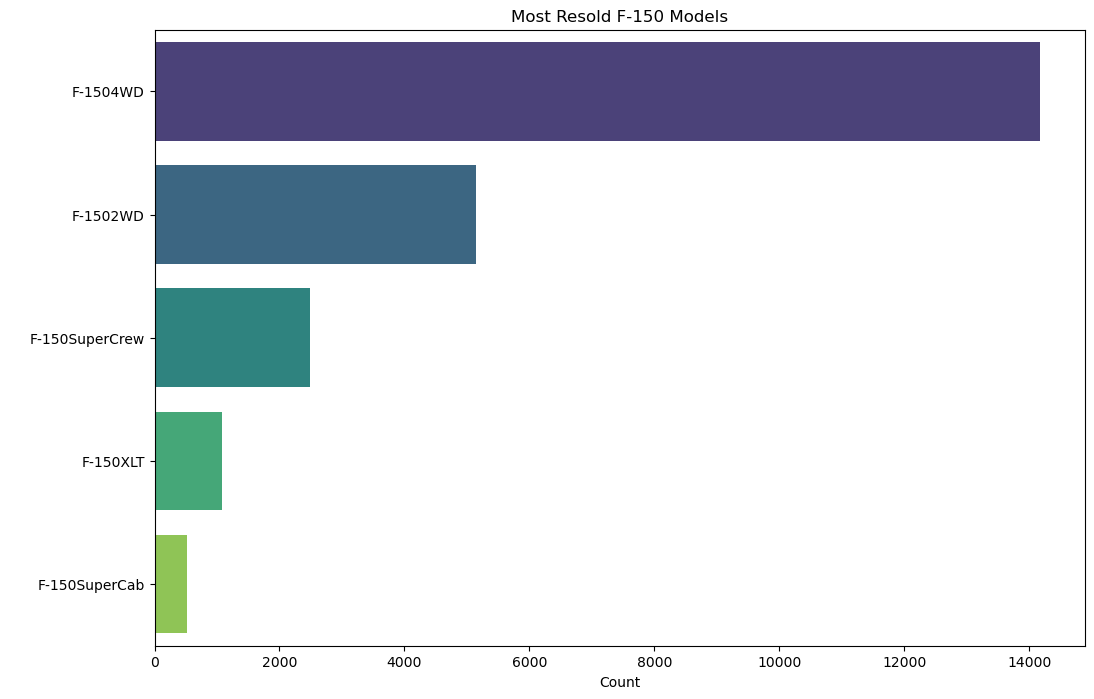

In [36]:
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='Model', data=top_5_F150, palette='viridis')
plt.title('Most Resold F-150 Models')
plt.xlabel('Count')
plt.ylabel(' ')
plt.show()

# Price :

## Next, we move onto Price

In [37]:
df

,Model,Price,Year,Mileage,City,State,Vin
0,FusionHybrid,$18021L,2020,22903.0,Fairfield,CA,FBA136F645B6F0A10
1,EscapeFWD,$8953S,2013,92616.0,Collinsville,IL,FB16ABDAA22090741
2,EdgeSEL,$23609D,2017,34523.0,Bloomington,MN,F70109BACF9EFF043
3,FocusSedan,$13762Q,2017,48969.0,Colorado Springs,CO,F8D81B18338DC83F7
4,ExplorerFWD,$36324C,2020,17080.0,Olathe,KS,F469E0851D6FC8B21
...,...,...,...,...,...,...,...
110412,F-150King,$53229S,2020,3514.0,Bartow,FL,F7E3634548C2AF622
110413,F-1502WD,$15768U,2009,109628.0,Phoenix,AZ,F3C43B5825806F345
110414,FiestaSedan,$13407K,2018,18158.0,Puyallup,WA,FADCED8151A11C731
110415,Mustang2dr,$12371P,2014,83325.0,Rochester,NY,F572078DCEB318125


In [38]:
# Lets split the price:
def split_price(price):
    symbol = price[0]  # The first character is the symbol
    number = ''.join(filter(str.isdigit, price))  # Extract numeric part
    character = price[-1]  # The last character is the trailing character
    return symbol, number, character

In [39]:
# Apply the function and convert to DataFrame
split_prices = df['Price'].apply(lambda x: pd.Series(split_price(x), index=['Currency', 'NewPrice', 'PriceCode']))

# Check intermediate results
print(split_prices.head())

  Currency NewPrice PriceCode
0        $    18021         L
1        $     8953         S
2        $    23609         D
3        $    13762         Q
4        $    36324         C


In [40]:
df

,Model,Price,Year,Mileage,City,State,Vin
0,FusionHybrid,$18021L,2020,22903.0,Fairfield,CA,FBA136F645B6F0A10
1,EscapeFWD,$8953S,2013,92616.0,Collinsville,IL,FB16ABDAA22090741
2,EdgeSEL,$23609D,2017,34523.0,Bloomington,MN,F70109BACF9EFF043
3,FocusSedan,$13762Q,2017,48969.0,Colorado Springs,CO,F8D81B18338DC83F7
4,ExplorerFWD,$36324C,2020,17080.0,Olathe,KS,F469E0851D6FC8B21
...,...,...,...,...,...,...,...
110412,F-150King,$53229S,2020,3514.0,Bartow,FL,F7E3634548C2AF622
110413,F-1502WD,$15768U,2009,109628.0,Phoenix,AZ,F3C43B5825806F345
110414,FiestaSedan,$13407K,2018,18158.0,Puyallup,WA,FADCED8151A11C731
110415,Mustang2dr,$12371P,2014,83325.0,Rochester,NY,F572078DCEB318125


In [41]:
# Assign the new columns to the original DataFrame
df[['Currency', 'NewPrice', 'PriceCode']] = split_prices

/var/folders/y5/8rly0f7n34s4b0dgj2d7k0gc0000gn/T/ipykernel_36513/4075549875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Currency', 'NewPrice', 'PriceCode']] = split_prices
/var/folders/y5/8rly0f7n34s4b0dgj2d7k0gc0000gn/T/ipykernel_36513/4075549875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Currency', 'NewPrice', 'PriceCode']] = split_prices
/var/folders/y5/8rly0f7n34s4b0dgj2d7k0gc0000gn/T/ipykernel_36513/4075549875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a co

In [42]:
# There is some sort of an issue here - I tried using df.loc but it returns NaN values 
df

,Model,Price,Year,Mileage,City,State,Vin,Currency,NewPrice,PriceCode
0,FusionHybrid,$18021L,2020,22903.0,Fairfield,CA,FBA136F645B6F0A10,$,18021,L
1,EscapeFWD,$8953S,2013,92616.0,Collinsville,IL,FB16ABDAA22090741,$,8953,S
2,EdgeSEL,$23609D,2017,34523.0,Bloomington,MN,F70109BACF9EFF043,$,23609,D
3,FocusSedan,$13762Q,2017,48969.0,Colorado Springs,CO,F8D81B18338DC83F7,$,13762,Q
4,ExplorerFWD,$36324C,2020,17080.0,Olathe,KS,F469E0851D6FC8B21,$,36324,C
...,...,...,...,...,...,...,...,...,...,...
110412,F-150King,$53229S,2020,3514.0,Bartow,FL,F7E3634548C2AF622,$,53229,S
110413,F-1502WD,$15768U,2009,109628.0,Phoenix,AZ,F3C43B5825806F345,$,15768,U
110414,FiestaSedan,$13407K,2018,18158.0,Puyallup,WA,FADCED8151A11C731,$,13407,K
110415,Mustang2dr,$12371P,2014,83325.0,Rochester,NY,F572078DCEB318125,$,12371,P


### Checking for Duplicates

In [43]:
df['Currency'].value_counts()

Currency
$    110417
Name: count, dtype: int64

In [44]:
df['NewPrice'].value_counts()

NewPrice
17534    18
15393    17
13444    17
15384    16
15429    16
         ..
57515     1
45031     1
49062     1
40360     1
53229     1
Name: count, Length: 37183, dtype: int64

In [45]:
df.sort_values(by='NewPrice', ascending=False)

,Model,Price,Year,Mileage,City,State,Vin,Currency,NewPrice,PriceCode
21765,Focus4dr,$9999S,2015,51889.0,Zelienople,PA,F2E82FBE7B8E0859B,$,9999,S
89262,FocusSedan,$9999H,2017,61461.0,Radcliff,KY,FD50CCEC34CB68A81,$,9999,H
96544,Mustang2dr,$9999I,2009,110346.0,Chesapeake,VA,FB776F29685CBBE30,$,9999,I
18931,FocusHatchback,$9999R,2017,86408.0,Falmouth,MA,F68F185CCD61D8B9A,$,9999,R
4377,FocusSedan,$9998C,2016,83230.0,Great Falls,MT,FB5EEBAE66B9D3111,$,9998,C
...,...,...,...,...,...,...,...,...,...,...
28140,Ranger2WD,$10002Z,2013,98009.0,Kingsport,TN,FCE7E6C5098544144,$,10002,Z
68487,Explorer4WD,$10002E,2013,110459.0,Melrose Park,IL,F4B675A9E963E488C,$,10002,E
29004,FocusHatchback,$10002Z,2016,37237.0,Silver Spring,MD,FDB31AFC1672D8502,$,10002,Z
54639,Mustang2dr,$10001Z,2015,131614.0,Raleigh,NC,F3A759421C285CAD9,$,10001,Z


These appear to be natural duplicates.

In [46]:
print(df['PriceCode'].value_counts())

PriceCode
C    4404
I    4335
U    4328
E    4316
Q    4312
S    4289
R    4261
V    4258
H    4258
F    4245
Z    4242
N    4242
P    4238
X    4235
L    4234
G    4234
A    4230
D    4230
T    4226
M    4223
O    4211
J    4207
B    4199
W    4179
Y    4169
K    4112
Name: count, dtype: int64


These pricecodes apear evenly distributed.

In [47]:
# we can drop the old price column and currency as all prices are in dollars
df.drop(columns=['Price', 'Currency'], inplace=True)

/var/folders/y5/8rly0f7n34s4b0dgj2d7k0gc0000gn/T/ipykernel_36513/4085099431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Price', 'Currency'], inplace=True)


In [48]:
df

,Model,Year,Mileage,City,State,Vin,NewPrice,PriceCode
0,FusionHybrid,2020,22903.0,Fairfield,CA,FBA136F645B6F0A10,18021,L
1,EscapeFWD,2013,92616.0,Collinsville,IL,FB16ABDAA22090741,8953,S
2,EdgeSEL,2017,34523.0,Bloomington,MN,F70109BACF9EFF043,23609,D
3,FocusSedan,2017,48969.0,Colorado Springs,CO,F8D81B18338DC83F7,13762,Q
4,ExplorerFWD,2020,17080.0,Olathe,KS,F469E0851D6FC8B21,36324,C
...,...,...,...,...,...,...,...,...
110412,F-150King,2020,3514.0,Bartow,FL,F7E3634548C2AF622,53229,S
110413,F-1502WD,2009,109628.0,Phoenix,AZ,F3C43B5825806F345,15768,U
110414,FiestaSedan,2018,18158.0,Puyallup,WA,FADCED8151A11C731,13407,K
110415,Mustang2dr,2014,83325.0,Rochester,NY,F572078DCEB318125,12371,P


In [49]:
df.rename(columns={'NewPrice': 'Price'}, inplace=True)

/var/folders/y5/8rly0f7n34s4b0dgj2d7k0gc0000gn/T/ipykernel_36513/3235892439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'NewPrice': 'Price'}, inplace=True)


In [50]:
df

,Model,Year,Mileage,City,State,Vin,Price,PriceCode
0,FusionHybrid,2020,22903.0,Fairfield,CA,FBA136F645B6F0A10,18021,L
1,EscapeFWD,2013,92616.0,Collinsville,IL,FB16ABDAA22090741,8953,S
2,EdgeSEL,2017,34523.0,Bloomington,MN,F70109BACF9EFF043,23609,D
3,FocusSedan,2017,48969.0,Colorado Springs,CO,F8D81B18338DC83F7,13762,Q
4,ExplorerFWD,2020,17080.0,Olathe,KS,F469E0851D6FC8B21,36324,C
...,...,...,...,...,...,...,...,...
110412,F-150King,2020,3514.0,Bartow,FL,F7E3634548C2AF622,53229,S
110413,F-1502WD,2009,109628.0,Phoenix,AZ,F3C43B5825806F345,15768,U
110414,FiestaSedan,2018,18158.0,Puyallup,WA,FADCED8151A11C731,13407,K
110415,Mustang2dr,2014,83325.0,Rochester,NY,F572078DCEB318125,12371,P


In [51]:
#rearange again
df = df[['Model', 'Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'PriceCode']]

In [52]:
df

,Model,Price,Year,Mileage,City,State,Vin,PriceCode
0,FusionHybrid,18021,2020,22903.0,Fairfield,CA,FBA136F645B6F0A10,L
1,EscapeFWD,8953,2013,92616.0,Collinsville,IL,FB16ABDAA22090741,S
2,EdgeSEL,23609,2017,34523.0,Bloomington,MN,F70109BACF9EFF043,D
3,FocusSedan,13762,2017,48969.0,Colorado Springs,CO,F8D81B18338DC83F7,Q
4,ExplorerFWD,36324,2020,17080.0,Olathe,KS,F469E0851D6FC8B21,C
...,...,...,...,...,...,...,...,...
110412,F-150King,53229,2020,3514.0,Bartow,FL,F7E3634548C2AF622,S
110413,F-1502WD,15768,2009,109628.0,Phoenix,AZ,F3C43B5825806F345,U
110414,FiestaSedan,13407,2018,18158.0,Puyallup,WA,FADCED8151A11C731,K
110415,Mustang2dr,12371,2014,83325.0,Rochester,NY,F572078DCEB318125,P


In [53]:
print(df.info()) #DataType

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110417 entries, 0 to 110416
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Model      110417 non-null  object 
 1   Price      110417 non-null  object 
 2   Year       110417 non-null  int64  
 3   Mileage    109312 non-null  float64
 4   City       110417 non-null  object 
 5   State      110417 non-null  object 
 6   Vin        110417 non-null  object 
 7   PriceCode  110417 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.7+ MB
None


In [54]:
#Now we want new price to be an int
df['Model'] = df['Model'].astype('category')
df['Price'] = df['Price'].astype(int)
df['City'] = df['City'].astype('category')
df['State'] = df['State'].astype('category')
df['Vin'] = df['Vin'].astype('string')
df['PriceCode'] = df['PriceCode'].astype('category')

In [55]:
df.describe()

,Price,Year,Mileage
count,110417.000000,110417.000000,1.093120e+05
mean,21907.722126,2016.199507,5.393903e+04
std,11460.531972,3.486181,4.878768e+04
min,1755.000000,2000.000000,-9.999990e+05
25%,13602.000000,2015.000000,2.588375e+04
50%,19427.000000,2017.000000,4.261350e+04
75%,28681.000000,2019.000000,7.700000e+04
max,400460.000000,2021.000000,1.650780e+06


## Lets do an image of the price distribution :


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


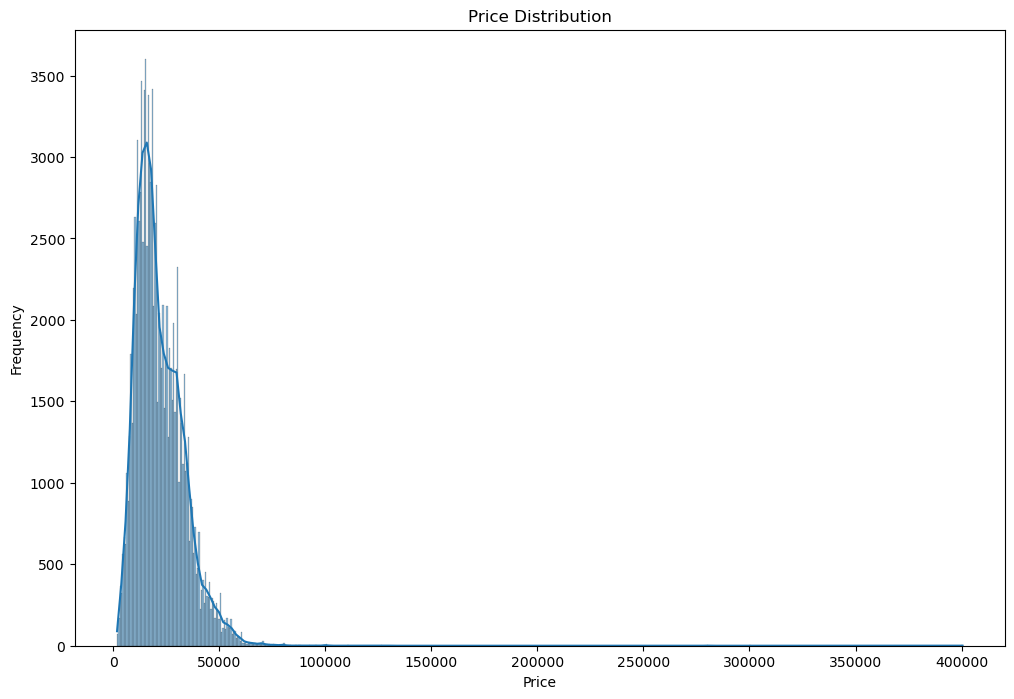

In [56]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Price'], kde=True)

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

It looks like there are some pretty extreme values, we should remove some outliers..

We could do this using IQR, but for now lets just filter it.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


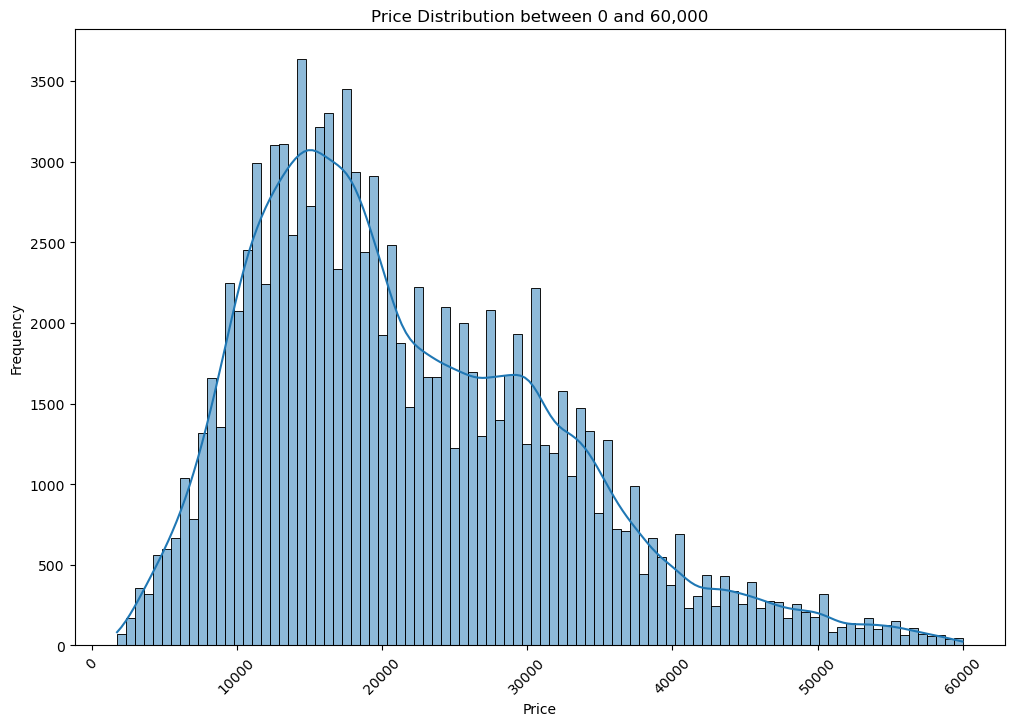

In [57]:
# Filter the DataFrame for prices between 0 and 100,000
filtered_df = df[(df['Price'] >= 0) & (df['Price'] <= 60000)]

# Plot price distribution
plt.figure(figsize=(12, 8))
sns.histplot(filtered_df['Price'], kde=True)

# Ensure the x-axis labels are displayed
plt.xticks(rotation=45)
plt.xlabel('Price')
plt.ylabel('Frequency')

# Add title
plt.title('Price Distribution between 0 and 60,000')

plt.show()


# Year :

## Now, lets move onto year

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


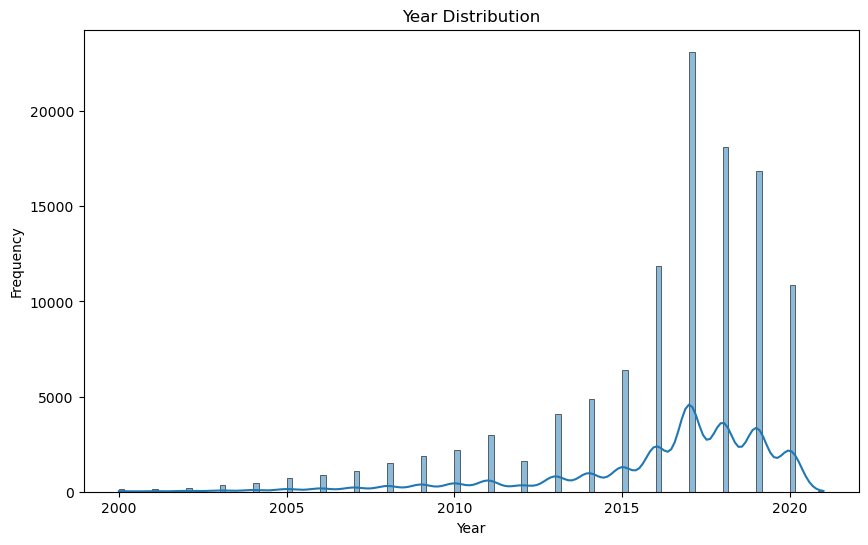

In [58]:
#now lets move onto year
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], kde=True)

plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


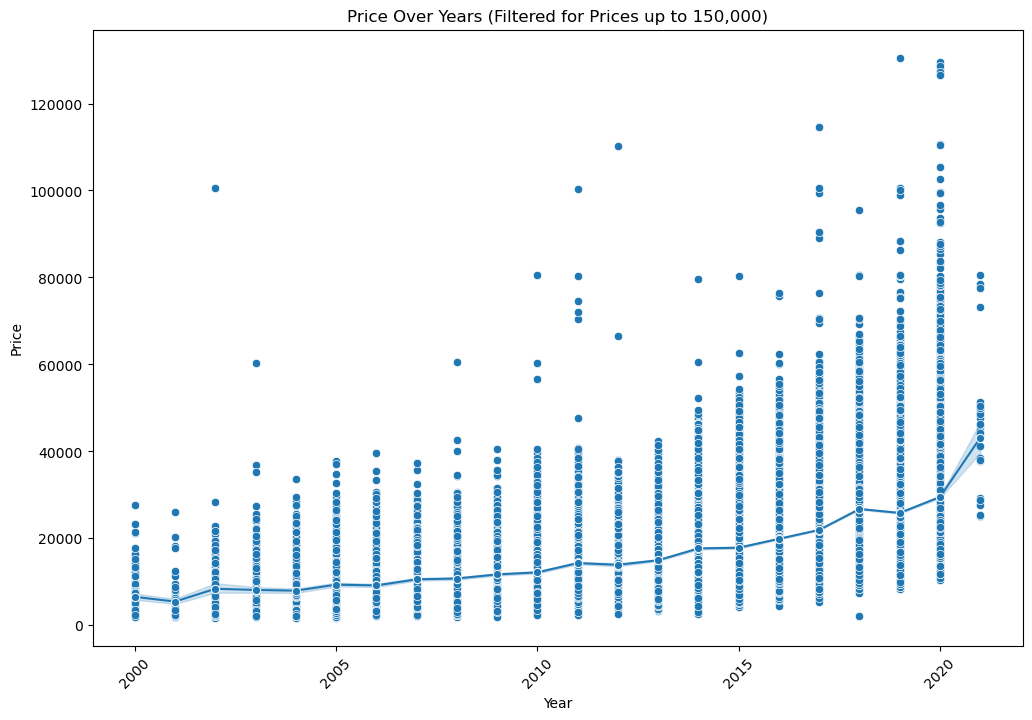

In [59]:
# Filter the DataFrame 
filtered_df2 = df[(df['Price'] >= 0) & (df['Price'] <= 150000)]

# Plot price against year
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df2, x='Year', y='Price')
sns.lineplot(data=filtered_df2, x='Year', y='Price', marker='o')

# labels
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Price')

# Title
plt.title('Price Over Years (Filtered for Prices up to 150,000)')

plt.show()

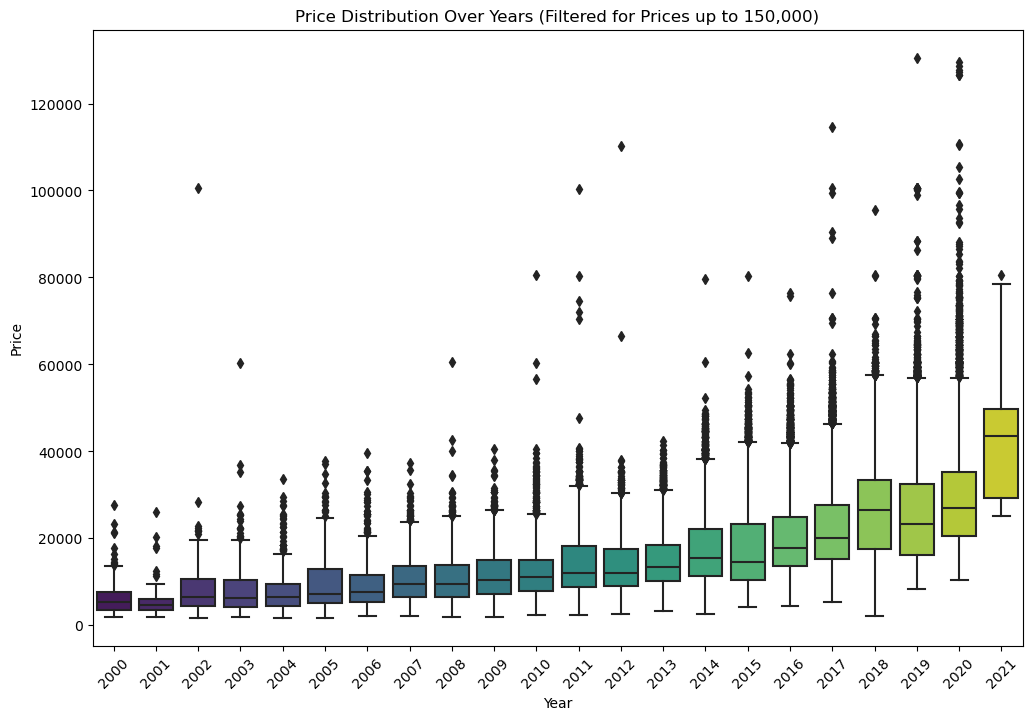

In [60]:
# Box Plot would be better:
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df2, x='Year', y='Price', palette='viridis')

# Labels
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Price')

# Title
plt.title('Price Distribution Over Years (Filtered for Prices up to 150,000)')

plt.show()

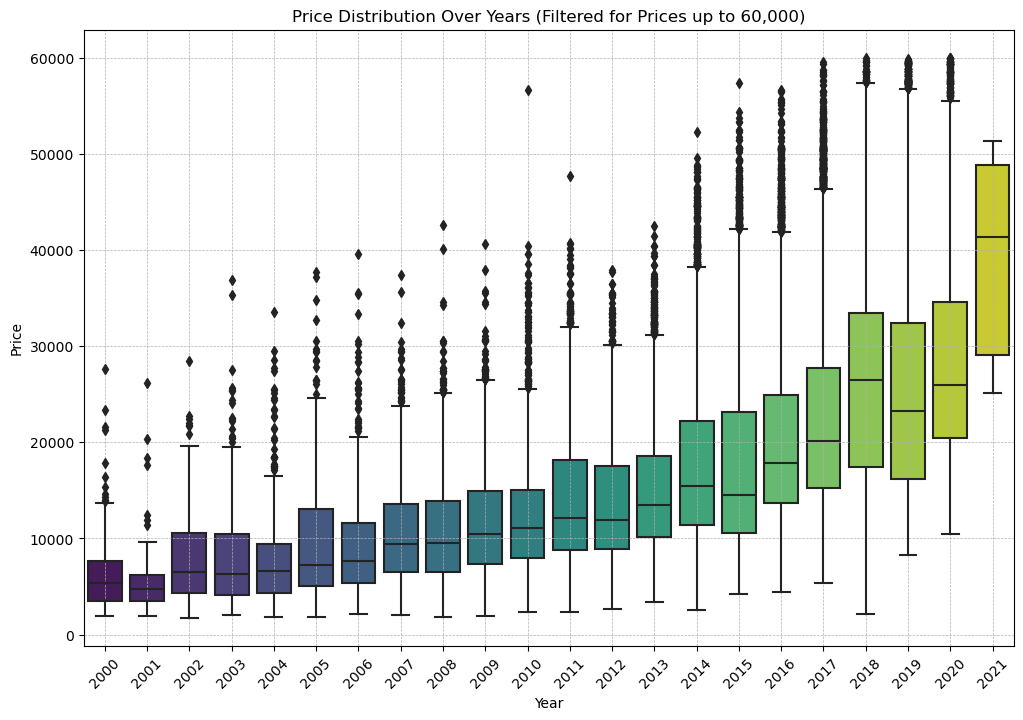

In [61]:
# Plot box plot of price against year
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='Year', y='Price', palette='viridis')

#Note the reverion back to filtered_df as we have already done this ^^

# Ensure the x-axis labels are displayed
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Price')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add title
plt.title('Price Distribution Over Years (Filtered for Prices up to 60,000)')

plt.show()

# Year,Model,Price :

## Lets Take a Deeper Look at the Realtionship between model and Price

In [62]:
# Calculate the average price for each car model
avg_prices = df.groupby('Model')['Price'].mean().reset_index()

/var/folders/y5/8rly0f7n34s4b0dgj2d7k0gc0000gn/T/ipykernel_36513/986585031.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_prices = df.groupby('Model')['Price'].mean().reset_index()


In [63]:
avg_prices.round().sort_values(by='Price', ascending=False)

,Model,Price
119,GT2dr,314643.0
70,F-150Raptor,70585.0
122,MustangCobra,60332.0
128,MustangShelby,57370.0
66,F-150King,52791.0
...,...,...
2,Contour4dr,3468.0
26,Escort2dr,3464.0
146,ZX22dr,3449.0
48,Explorer2dr,3381.0


In [64]:
# Save as dataframe
Model_Price = avg_prices.round().sort_values(by='Price', ascending=False)

In [65]:
# Save as CSV
Model_Price.to_csv('Model_Price.csv')

We Export Model Price to CSV so we can use an LLM to convert the 'Model' into more detailed colums.
We could have split them using text cleaning techniques, but this would have been time consiming.
Instead we can use the model's knowledge to our advantage. 

In [66]:
# Perform ANOVA
anova_results = stats.f_oneway(*(df[df['Model'] == model]['Price'] for model in df['Model'].unique()))

print(f'ANOVA results: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}')

ANOVA results: F-statistic = 1030.1574182787635, p-value = 0.0


ANOVA Confirms suspicion that model is feature of high importance, p-value suggests no noise

In [67]:
Model_Info = pd.read_csv('/Users/angusmclean/Downloads/Model Split Categories.csv')

Model_Info

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Model,Price,Main Category,Sub Category
1,GT2dr,314643.0,GT,2dr
2,F-150Raptor,70585.0,F-150,Raptor
3,MustangCobra,60332.0,Mustang,Cobra
4,MustangShelby,57370.0,Mustang,Shelby
...,...,...,...,...
143,Contour4dr,3468.0,Contour,4dr
144,Escort2dr,3464.0,Escort,2dr
145,ZX22dr,3449.0,ZX2,2dr
146,Explorer2dr,3381.0,Explorer,2dr


In [68]:
Model_Info = Model_Info.drop(0).reset_index(drop=True)

# Rename the columns
Model_Info.columns = ['Model', 'Price', 'Main Category', 'Sub Category']

Model_Info

,Model,Price,Main Category,Sub Category
0,GT2dr,314643.0,GT,2dr
1,F-150Raptor,70585.0,F-150,Raptor
2,MustangCobra,60332.0,Mustang,Cobra
3,MustangShelby,57370.0,Mustang,Shelby
4,F-150King,52791.0,F-150,King
...,...,...,...,...
142,Contour4dr,3468.0,Contour,4dr
143,Escort2dr,3464.0,Escort,2dr
144,ZX22dr,3449.0,ZX2,2dr
145,Explorer2dr,3381.0,Explorer,2dr


In [69]:
# Convert 'Price' column to numeric, coercing errors to NaN
Model_Info['Price'] = pd.to_numeric(Model_Info['Price'], errors='coerce')

# Drop rows where 'Price' is NaN
Model_Info = Model_Info.dropna(subset=['Price'])

# Group by "Main Category" and aggregate "Sub Category" into a list and "Price" to compute the mean
grouped_df = Model_Info.groupby('Main Category').agg({
    'Sub Category': list,
    'Price': 'mean'
}).reset_index()

grouped_df

,Main Category,Sub Category,Price
0,C-Max,[-],16267.000000
1,Club,[-],5339.000000
2,Contour,[4dr],3468.000000
3,Crown,[-],5212.000000
4,E-Series,[-],36884.000000
5,Econoline,[-],16563.000000
6,Edge,"[Titanium, Sport, SEL, Limited, LTD, SE, 4dr, ...",18812.888889
7,Escape,"[Titanium, 4WD, FWD, SE, SPORT, SEL, S, XLS, 2...",13033.545455
8,Escort,"[SE, 4dr, 2dr, Fleet]",3604.250000
9,Excursion,"[2005, 137""]",17132.000000


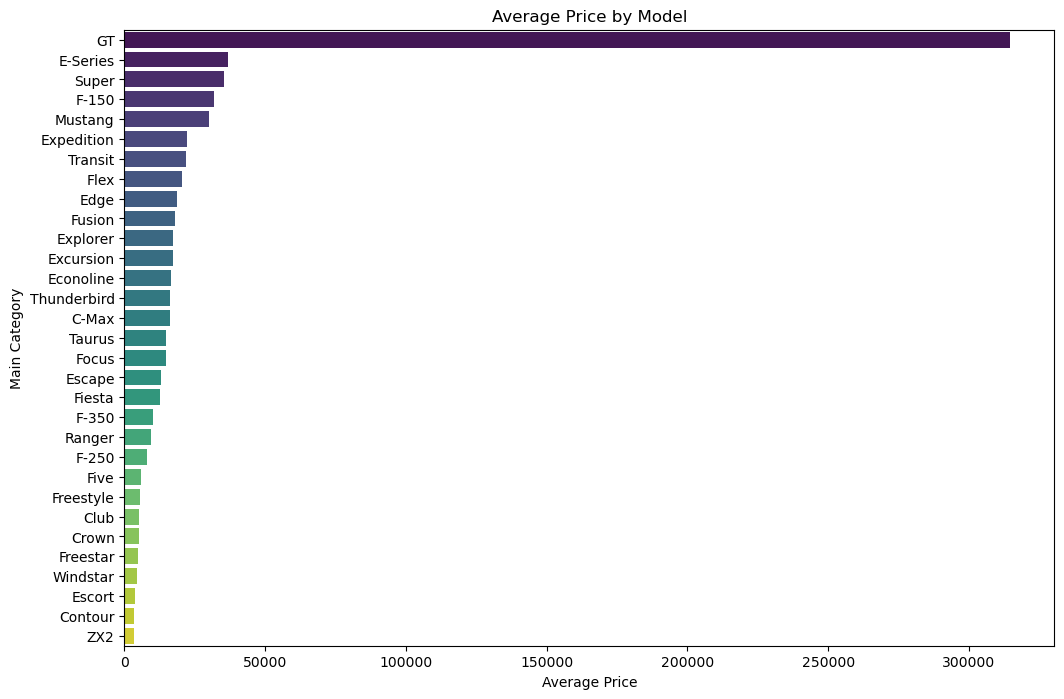

In [70]:
# Sort the grouped DataFrame by 'Price' in ascending order
sorted_df = grouped_df.sort_values(by='Price', ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='Main Category', data=sorted_df, palette='viridis')
plt.xlabel('Average Price')
plt.ylabel('Main Category')
plt.title('Average Price by Model')
plt.show()

Ford GT is making it difficult to see the other models so lets remove it:

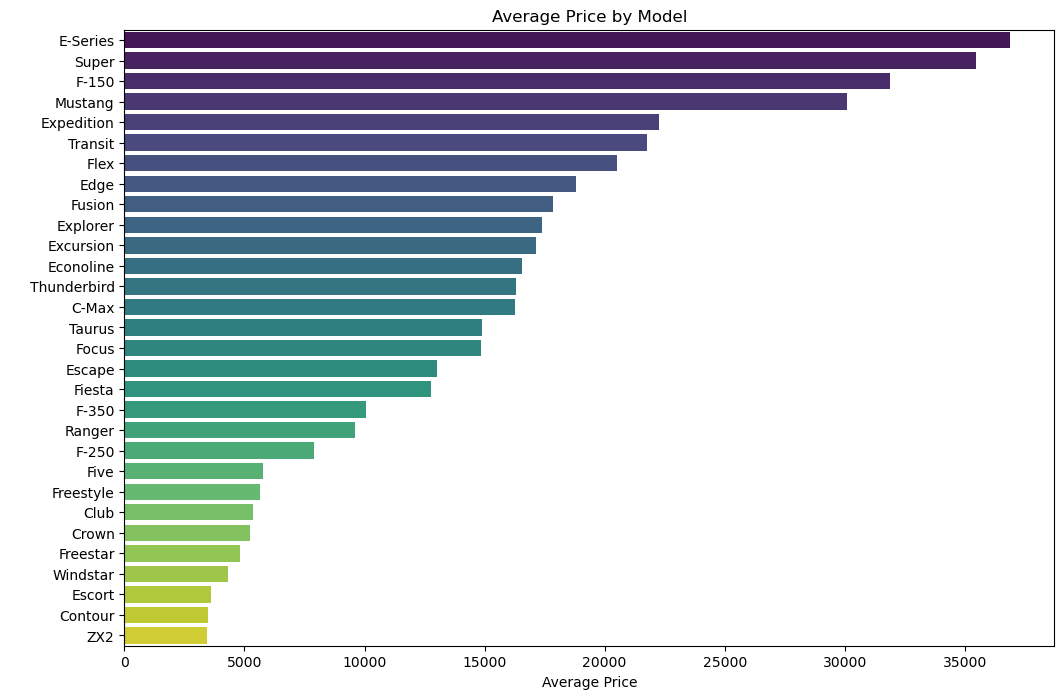

In [71]:
sorted_df = sorted_df[sorted_df['Main Category'] != 'GT']

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='Main Category', data=sorted_df, palette='viridis')
plt.xlabel('Average Price')
plt.ylabel(' ')
plt.title('Average Price by Model')
plt.show()

In [72]:
sorted_df

,Main Category,Sub Category,Price
4,E-Series,[-],36884.000000
25,Super,[-],35455.000000
12,F-150,"[Raptor, King, Lariat, Limited, Platinum, SVT,...",31890.500000
23,Mustang,"[Cobra, Shelby, GT, Fastback, EcoBoost, V6, Co...",30094.600000
10,Expedition,"[Platinum, Limited, King, XLT, -, 4WD, EL, 2WD...",22255.357143
28,Transit,[-],21759.000000
17,Flex,"[Limited, SEL, SE, 4dr]",20504.750000
6,Edge,"[Titanium, Sport, SEL, Limited, LTD, SE, 4dr, ...",18812.888889
21,Fusion,"[Sport, Platinum, -, Titanium, Hybrid, SE, S, ...",17834.111111
11,Explorer,"[Sport, 4WD, FWD, Limited, XLT, Base, Police, ...",17394.538462


In [73]:
sorted_df.to_csv('Cars_By_Model.csv')

In [74]:
Supra_Category = pd.read_csv('/Users/angusmclean/Downloads/Supra Category.csv')

In [75]:
Supra_Category

,Main Category,Sub Category,Price,Supra Category,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,E-Series,['-'],36884.000,Truck,NaN,NaN,NaN
1,Super,['-'],35455.000,Truck,NaN,NaN,NaN
2,F-150,"['Raptor', 'King', 'Lariat', 'Limited', 'Plati...",31890.500,Truck,NaN,NaN,NaN
3,Mustang,"['Cobra', 'Shelby', 'GT', 'Fastback', 'EcoBoos...",30094.600,Sports Car,NaN,NaN,NaN
4,Expedition,"['Platinum', 'Limited', 'King', 'XLT', '-', '4...",22255.357,SUV,NaN,NaN,NaN
5,Transit,['-'],21759.000,Van,NaN,NaN,NaN
6,Flex,"['Limited', 'SEL', 'SE', '4dr']",20504.750,Family Car,NaN,NaN,NaN
7,Edge,"['Titanium', 'Sport', 'SEL', 'Limited', 'LTD',...",18812.889,SUV,NaN,NaN,NaN
8,Fusion,"['Sport', 'Platinum', '-', 'Titanium', 'Hybrid...",17834.111,Family Car,NaN,NaN,NaN
9,Explorer,"['Sport', '4WD', 'FWD', 'Limited', 'XLT', 'Bas...",17394.538,SUV,NaN,NaN,NaN


In [76]:
cols = [4,5,6]
Supra_Category.drop(Supra_Category.columns[cols],axis=1,inplace=True)

In [77]:
Supra_Category

,Main Category,Sub Category,Price,Supra Category
0,E-Series,['-'],36884.000,Truck
1,Super,['-'],35455.000,Truck
2,F-150,"['Raptor', 'King', 'Lariat', 'Limited', 'Plati...",31890.500,Truck
3,Mustang,"['Cobra', 'Shelby', 'GT', 'Fastback', 'EcoBoos...",30094.600,Sports Car
4,Expedition,"['Platinum', 'Limited', 'King', 'XLT', '-', '4...",22255.357,SUV
5,Transit,['-'],21759.000,Van
6,Flex,"['Limited', 'SEL', 'SE', '4dr']",20504.750,Family Car
7,Edge,"['Titanium', 'Sport', 'SEL', 'Limited', 'LTD',...",18812.889,SUV
8,Fusion,"['Sport', 'Platinum', '-', 'Titanium', 'Hybrid...",17834.111,Family Car
9,Explorer,"['Sport', '4WD', 'FWD', 'Limited', 'XLT', 'Bas...",17394.538,SUV


In [78]:
price_category = Supra_Category.groupby('Supra Category')['Price'].mean().round().reset_index()

In [79]:
price_category = price_category.sort_values(by='Price', ascending=False)

In [80]:
price_category

,Supra Category,Price
3,Truck,21959.0
1,SUV,17726.0
2,Sports Car,13796.0
4,Van,11868.0
0,Family Car,10981.0


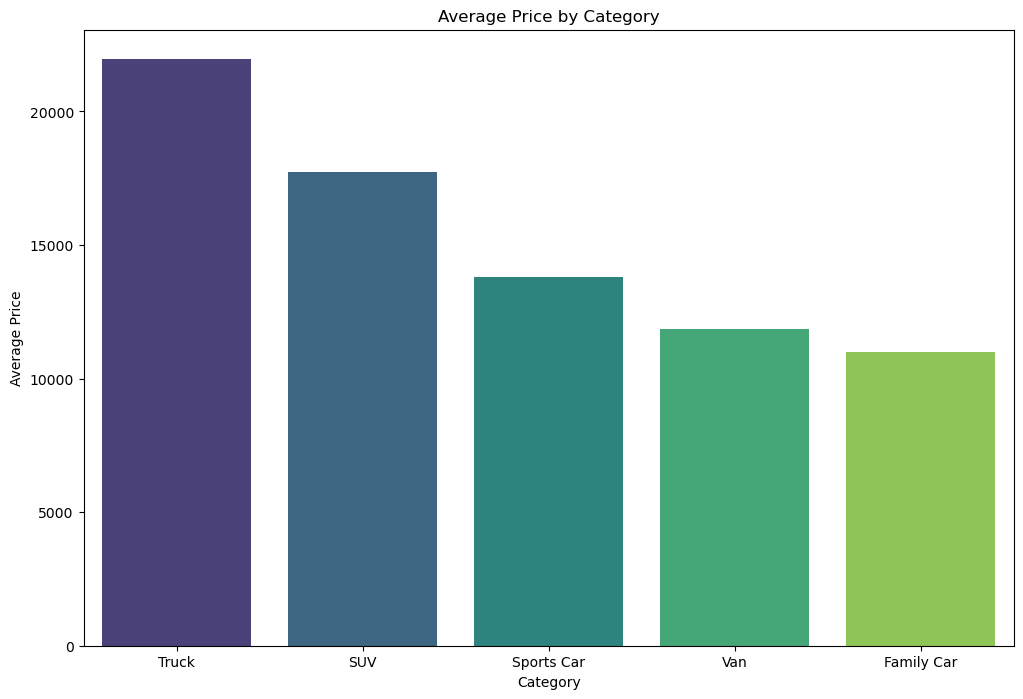

In [81]:
# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Supra Category', y='Price', data=price_category, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Average Price by Category')
plt.show()

In [82]:
Model_Info['Sub Category'].value_counts()

Sub Category
-              20
4dr            12
SE              8
2WD             7
2dr             7
Limited         6
SEL             6
4WD             6
Titanium        5
S               4
Platinum        3
Sport           3
AWD             3
FWD             3
XL              3
XLT             3
Hatchback       2
Police          2
Base            2
5dr             2
Sedan           2
King            2
ST              2
Regular         1
137"            1
SPORT           1
4.6L            1
07              1
5.4L            1
119"            1
3dr             1
XLS             1
Edge            1
2005            1
Eddie           1
RWD             1
SuperCab        1
Hybrid          1
LTD             1
Cobra           1
Shelby          1
Lariat          1
RS              1
SVT             1
GT              1
SuperCrew       1
FX4             1
Fastback        1
SHO             1
EL              1
2010            1
EcoBoost        1
Raptor          1
V6              1
Coupe          

Annoyingly the subcategories don't appear to be useful.

# Mileage :

## Now lets move onto Mileage

In [83]:
#ten miles seems low, but could be new?
df['Mileage'].value_counts()

Mileage
10.0        142
11.0         30
12.0         15
43000.0      13
111000.0     13
           ... 
155918.0      1
89135.0       1
157017.0      1
112333.0      1
109628.0      1
Name: count, Length: 70912, dtype: int64

In [84]:
mileage_ascending = df.sort_values(by='Mileage', ascending=True)

In [85]:
mileage_ascending

,Model,Price,Year,Mileage,City,State,Vin,PriceCode
108767,Focus5dr,3295,2006,-999999.0,Abington,MA,FCADA8A146856CF48,W
96526,F-1502WD,3191,2000,-999999.0,Brandon,MS,FFA1AAFE12FE3869C,K
78774,"Expedition119""",2151,2002,-777777.0,Jacksonville,FL,FF633126F9C31E65B,J
36595,F-1502WD,3619,2009,-455806.0,Keller,TX,FF1AA91BAAD9C4E78,K
38341,Explorer,3144,2005,-366161.0,Edgefield,SC,F411D20A15F175C36,M
...,...,...,...,...,...,...,...,...
110198,Mustang2dr,56645,2010,NaN,Ronan,MT,FCB3A28F4F922D0B4,D
110206,Super,75530,2020,NaN,Lewisville,TX,FE92AEC1C3C28F268,V
110250,F-150Raptor,92640,2020,NaN,Pauls Valley,OK,FE1534E9FE77BE036,H
110303,F-1504WD,80241,2018,NaN,Dallas,TX,F7BCA33C5559A4C22,G


Negative Mileage is a problem.

We also identified missing mileage earlier on.

In [86]:
mileage_descending = df.sort_values(by='Mileage', ascending=False)

In [87]:
mileage_descending

,Model,Price,Year,Mileage,City,State,Vin,PriceCode
59497,ExplorerRWD,6394,2013,1650780.0,Fort Lauderdale,FL,F8E80C74295E620BC,K
65728,F-1504WD,15365,2009,1554010.0,Billings,MT,F3DF9B2AF33309E43,P
94185,Super,17467,2008,1428913.0,Idaho Falls,ID,F4A19CB338004104F,W
101400,Focus4dr,9635,2015,1111111.0,Kerrville,TX,F6BF663B6583BE5F5,N
36863,Focus3dr,6181,2010,999999.0,Plattsmouth,NE,F3FA58695ED5FBDCC,C
...,...,...,...,...,...,...,...,...
110198,Mustang2dr,56645,2010,NaN,Ronan,MT,FCB3A28F4F922D0B4,D
110206,Super,75530,2020,NaN,Lewisville,TX,FE92AEC1C3C28F268,V
110250,F-150Raptor,92640,2020,NaN,Pauls Valley,OK,FE1534E9FE77BE036,H
110303,F-1504WD,80241,2018,NaN,Dallas,TX,F7BCA33C5559A4C22,G


Anything over 1m miles is very high...

## Convert Negative To Positve

In [88]:
df.describe()

,Price,Year,Mileage
count,110417.000000,110417.000000,1.093120e+05
mean,21907.722126,2016.199507,5.393903e+04
std,11460.531972,3.486181,4.878768e+04
min,1755.000000,2000.000000,-9.999990e+05
25%,13602.000000,2015.000000,2.588375e+04
50%,19427.000000,2017.000000,4.261350e+04
75%,28681.000000,2019.000000,7.700000e+04
max,400460.000000,2021.000000,1.650780e+06


In [89]:
#quite unusual to have negative mileage
Neagtive_Mileage = df[(df['Mileage'] <= 0)]

In [90]:
Neagtive_Mileage

,Model,Price,Year,Mileage,City,State,Vin,PriceCode
68,Focus3dr,2845,2010,-154461.0,Nokomis,FL,F20FDF0889CEE550B,G
82,Explorer4dr,4405,2009,-188670.0,Boyertown,PA,F6577F8EEAB8D5AC4,F
96,Freestar,2255,2007,-149679.0,Omaha,NE,F244A4380D1EC0064,M
232,Taurus4dr,2581,2006,-90376.0,Orlando,FL,F1FD12F346877643D,A
242,Taurus4dr,4397,2004,-86110.0,Richfield,UT,FDB2B79933534D137,B
...,...,...,...,...,...,...,...,...
110106,Contour4dr,3484,2001,-194279.0,Spokane Valley,WA,F216BA8FB9B5BFE3D,P
110180,Windstar,2041,2004,-188445.0,Melrose Park,IL,FD84B524106C8D2AA,I
110369,Focus4dr,4396,2012,-136758.0,Richmond,VA,FCBC0428678A60848,C
110379,Explorer4dr,3963,2008,-165524.0,Fairfield,OH,F12D9D70400ABF458,G


In [91]:
#over 1% of the data is affected. But the negative milages seem plausable as positives.

In [92]:
# Convert to positive
df['Mileage'] = df['Mileage'].abs()

In [93]:
df.describe()

,Price,Year,Mileage
count,110417.000000,110417.000000,1.093120e+05
mean,21907.722126,2016.199507,5.733934e+04
std,11460.531972,3.486181,4.474208e+04
min,1755.000000,2000.000000,5.000000e+00
25%,13602.000000,2015.000000,2.659000e+04
50%,19427.000000,2017.000000,4.345350e+04
75%,28681.000000,2019.000000,7.890925e+04
max,400460.000000,2021.000000,1.650780e+06


## Trim Using IQR

In [94]:
# Calculate the Quartiles --- Q1 (25th percentile) and --- Q3(75th percentile)
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)

# Calculate interquartile Range)
IQR = Q3 - Q1 # in the middle of the two values.

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 3 * IQR  # Q1 minus 3 times the IQR. - 3 because we don't want to remove too much data
upper_bound = Q3 + 3 * IQR  # Q3 plus 3 times the IQR. 

# Print bounds to verify
print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')

Lower bound: -130367.75, Upper bound: 235867.0


In [95]:
df.sort_values(by='Mileage', ascending=True)

,Model,Price,Year,Mileage,City,State,Vin,PriceCode
109784,FiestaHatchback,19592,2019,5.0,Hialeah,FL,F191DFC6B445900A3,A
58025,FusionSE,27662,2020,5.0,Independence,MO,FFA14D626A19BCE97,X
59908,F-1502WD,29825,2019,5.0,Ventura,CA,FE238873CBC8A0D8B,Z
63407,FusionSE,16343,2018,5.0,Cedartown,GA,FE8F816BF9A95C8BB,N
68373,FusionSE,23085,2020,5.0,Long Island City,NY,F2F0F49AB55C72ACB,M
...,...,...,...,...,...,...,...,...
110198,Mustang2dr,56645,2010,NaN,Ronan,MT,FCB3A28F4F922D0B4,D
110206,Super,75530,2020,NaN,Lewisville,TX,FE92AEC1C3C28F268,V
110250,F-150Raptor,92640,2020,NaN,Pauls Valley,OK,FE1534E9FE77BE036,H
110303,F-1504WD,80241,2018,NaN,Dallas,TX,F7BCA33C5559A4C22,G


In [96]:
# find how may we have deleted over ---> 55222

df.sort_values(by='Price', ascending=False).head(1000)

,Model,Price,Year,Mileage,City,State,Vin,PriceCode
37075,GT2dr,400460,2009,NaN,Jamaica,NY,FE12EF5D17B077B2A,L
78617,GT2dr,400336,2009,NaN,Boerne,TX,FA0D19B17B16561F8,G
17312,GT2dr,300562,2008,NaN,Vista,CA,FFAA24A6A1A55E291,X
67601,GT2dr,300340,2009,NaN,Freeport,NY,F315149C60B370A50,D
91786,GT2dr,299311,2008,NaN,Westville,NJ,F91644CC19C791491,U
...,...,...,...,...,...,...,...,...
25521,Super,55543,2018,NaN,Blair,NE,F6613D060E396C331,O
46401,Super,55542,2019,NaN,Millington,TN,F853CFEE0D0DC0CE2,H
48850,Super,55532,2019,NaN,Sparta,TN,FC3D7B393C2EDB65A,T
42006,Super,55532,2018,NaN,Cary,NC,FA2E175322F9FD183,O


In [97]:
df.describe()

,Price,Year,Mileage
count,110417.000000,110417.000000,1.093120e+05
mean,21907.722126,2016.199507,5.733934e+04
std,11460.531972,3.486181,4.474208e+04
min,1755.000000,2000.000000,5.000000e+00
25%,13602.000000,2015.000000,2.659000e+04
50%,19427.000000,2017.000000,4.345350e+04
75%,28681.000000,2019.000000,7.890925e+04
max,400460.000000,2021.000000,1.650780e+06


In [98]:
# Filter out the outliers
df = df[(df['Mileage'] >= lower_bound) & (df['Mileage'] <= upper_bound)]

In [99]:
# The original size of the data set was 110417 so we have only trimmed by 2%
df.shape

(108888, 8)

In [100]:
df.describe()

,Price,Year,Mileage
count,108888.000000,108888.000000,108888.000000
mean,21518.115587,2016.207479,56411.133789
std,10326.969534,3.438165,41315.884201
min,1755.000000,2000.000000,5.000000
25%,13594.000000,2015.000000,26528.750000
50%,19372.000000,2017.000000,43290.500000
75%,28473.000000,2018.000000,78298.250000
max,55222.000000,2021.000000,235835.000000


Nb. Cutting Mileage Using IQR, also cuts price cut down to $55'000, but its only 1000 prices that are above this.

We can see this visually in the earlier price distribution.

In [101]:
df.isnull().sum() #Check for null values

Model        0
Price        0
Year         0
Mileage      0
City         0
State        0
Vin          0
PriceCode    0
dtype: int64

# Catboost Impute (Removed)

In [102]:
# missing millage for 1105 rows of 110'417 or less than 1%
#Lets impute using a linear regression as milage is an important variable and we should be able to get a good prediction base of the data we have

# Separate the features and the target
#X = df.drop(columns=['Vin'])
#y = df['Mileage']

# Identify categorical features
#categorical_features = ['Model', 'State', 'City', 'PriceCode']

# Split the data into training (non-missing) and test sets (missing)
#X_train = X[y.notna()]
#y_train = y[y.notna()]
#X_test = X[y.isna()]

# Evaluate the model using cross-validation
#model = CatBoostRegressor(cat_features=categorical_features, verbose=0)
#scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
#print(f'Mean Absolute Error: {-scores.mean():.2f} ± {scores.std():.2f}')

In [103]:
# 261 miles of is pretty good error rate

In [104]:
# Train the CatBoost model on non-missing data
#model.fit(X_train, y_train)

# Predict the missing values
#predicted_mileage = model.predict(X_test)

# Impute the missing values
#df.loc[y.isna(), 'Mileage'] = predicted_mileage

# Display the DataFrame with imputed values
#df

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


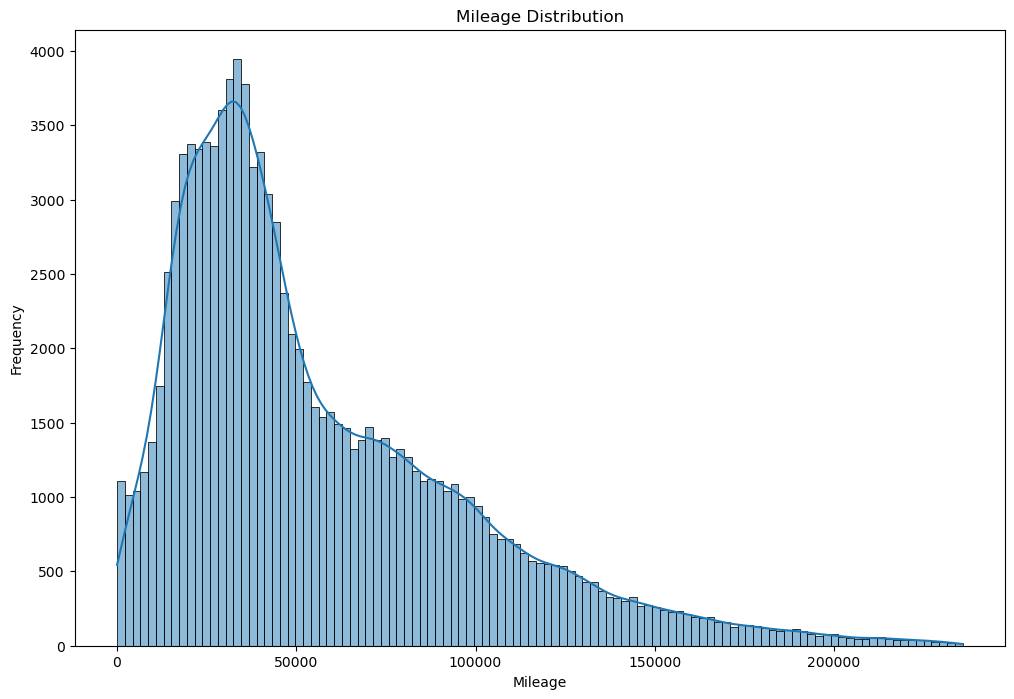

In [105]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Mileage'], kde=True)

plt.title('Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

In [106]:
df

,Model,Price,Year,Mileage,City,State,Vin,PriceCode
0,FusionHybrid,18021,2020,22903.0,Fairfield,CA,FBA136F645B6F0A10,L
1,EscapeFWD,8953,2013,92616.0,Collinsville,IL,FB16ABDAA22090741,S
2,EdgeSEL,23609,2017,34523.0,Bloomington,MN,F70109BACF9EFF043,D
3,FocusSedan,13762,2017,48969.0,Colorado Springs,CO,F8D81B18338DC83F7,Q
4,ExplorerFWD,36324,2020,17080.0,Olathe,KS,F469E0851D6FC8B21,C
...,...,...,...,...,...,...,...,...
110412,F-150King,53229,2020,3514.0,Bartow,FL,F7E3634548C2AF622,S
110413,F-1502WD,15768,2009,109628.0,Phoenix,AZ,F3C43B5825806F345,U
110414,FiestaSedan,13407,2018,18158.0,Puyallup,WA,FADCED8151A11C731,K
110415,Mustang2dr,12371,2014,83325.0,Rochester,NY,F572078DCEB318125,P


/var/folders/y5/8rly0f7n34s4b0dgj2d7k0gc0000gn/T/ipykernel_36513/1847140560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_Band'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)
/var/folders/y5/8rly0f7n34s4b0dgj2d7k0gc0000gn/T/ipykernel_36513/1847140560.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_mean = df.groupby('Price_Band')['Mileage'].median().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to Tru

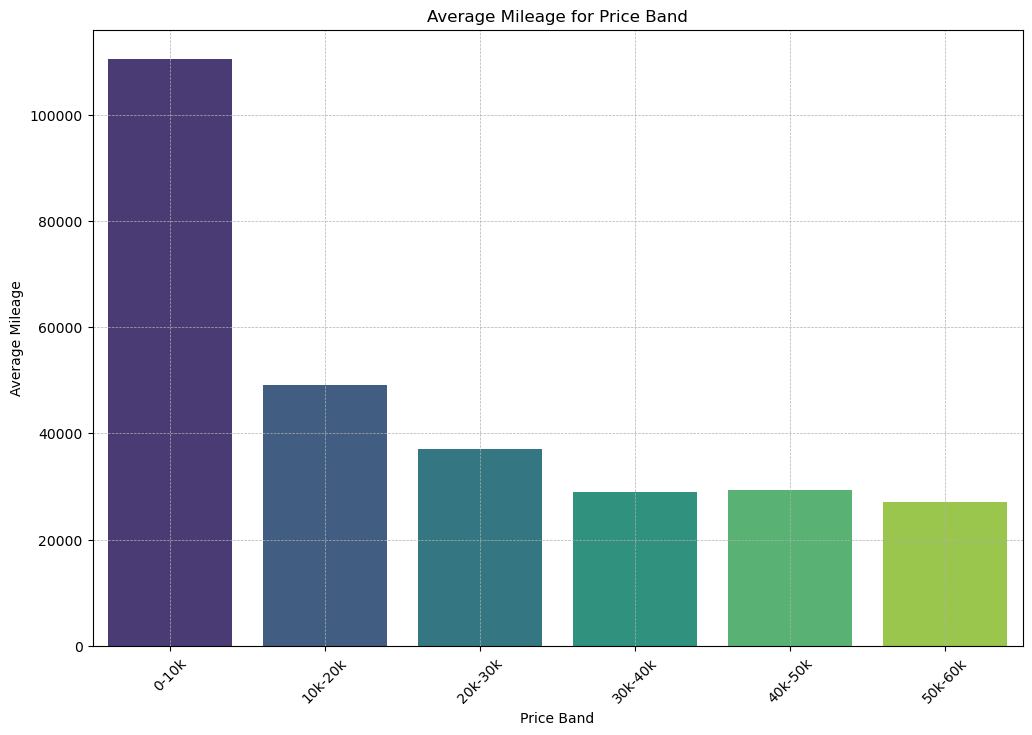

In [107]:
# Create price bins
price_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000]
price_labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k']
df['Price_Band'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)

# Calculate the average mileage for each price band
mileage_mean = df.groupby('Price_Band')['Mileage'].median().reset_index()

# Plot average mileage against price bands
plt.figure(figsize=(12, 8))
sns.barplot(data=mileage_mean, x='Price_Band', y='Mileage', palette='viridis')

# Ensure the x-axis labels are displayed
plt.xticks(rotation=45)
plt.xlabel('Price Band')
plt.ylabel('Average Mileage')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add title
plt.title('Average Mileage for Price Band')

plt.show()

In [108]:
print(df['Price_Band'].value_counts())

Price_Band
10k-20k    45612
20k-30k    28716
30k-40k    17061
0-10k      11322
40k-50k     4992
50k-60k     1185
Name: count, dtype: int64


In [109]:
df

,Model,Price,Year,Mileage,City,State,Vin,PriceCode,Price_Band
0,FusionHybrid,18021,2020,22903.0,Fairfield,CA,FBA136F645B6F0A10,L,10k-20k
1,EscapeFWD,8953,2013,92616.0,Collinsville,IL,FB16ABDAA22090741,S,0-10k
2,EdgeSEL,23609,2017,34523.0,Bloomington,MN,F70109BACF9EFF043,D,20k-30k
3,FocusSedan,13762,2017,48969.0,Colorado Springs,CO,F8D81B18338DC83F7,Q,10k-20k
4,ExplorerFWD,36324,2020,17080.0,Olathe,KS,F469E0851D6FC8B21,C,30k-40k
...,...,...,...,...,...,...,...,...,...
110412,F-150King,53229,2020,3514.0,Bartow,FL,F7E3634548C2AF622,S,50k-60k
110413,F-1502WD,15768,2009,109628.0,Phoenix,AZ,F3C43B5825806F345,U,10k-20k
110414,FiestaSedan,13407,2018,18158.0,Puyallup,WA,FADCED8151A11C731,K,10k-20k
110415,Mustang2dr,12371,2014,83325.0,Rochester,NY,F572078DCEB318125,P,10k-20k


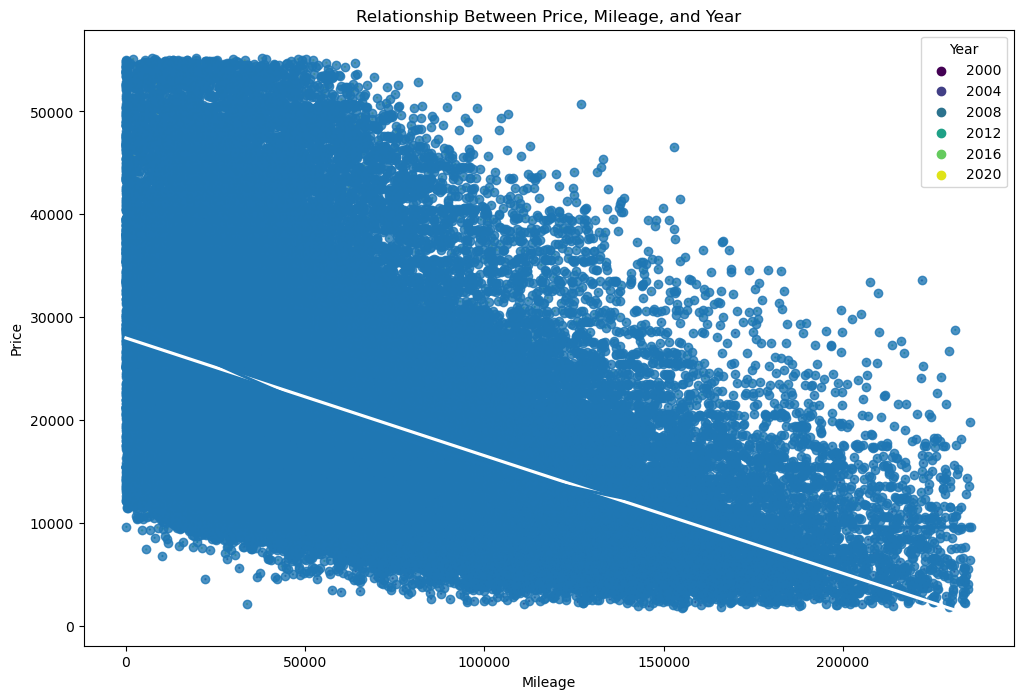

In [110]:
# Scatter plot using seaborn with 'viridis' palette and smaller dots
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Mileage', y='Price', hue='Year', palette='viridis', s=3)
sns.regplot(data=df, x='Mileage', y='Price', scatter=False, color='white')
sns.regplot(data=df, x="Mileage", y="Price", order=2)


# Adding titles and labels
plt.title('Relationship Between Price, Mileage, and Year')
plt.xlabel('Mileage')
plt.ylabel('Price')

# Show plot
plt.show()

In [111]:
df

,Model,Price,Year,Mileage,City,State,Vin,PriceCode,Price_Band
0,FusionHybrid,18021,2020,22903.0,Fairfield,CA,FBA136F645B6F0A10,L,10k-20k
1,EscapeFWD,8953,2013,92616.0,Collinsville,IL,FB16ABDAA22090741,S,0-10k
2,EdgeSEL,23609,2017,34523.0,Bloomington,MN,F70109BACF9EFF043,D,20k-30k
3,FocusSedan,13762,2017,48969.0,Colorado Springs,CO,F8D81B18338DC83F7,Q,10k-20k
4,ExplorerFWD,36324,2020,17080.0,Olathe,KS,F469E0851D6FC8B21,C,30k-40k
...,...,...,...,...,...,...,...,...,...
110412,F-150King,53229,2020,3514.0,Bartow,FL,F7E3634548C2AF622,S,50k-60k
110413,F-1502WD,15768,2009,109628.0,Phoenix,AZ,F3C43B5825806F345,U,10k-20k
110414,FiestaSedan,13407,2018,18158.0,Puyallup,WA,FADCED8151A11C731,K,10k-20k
110415,Mustang2dr,12371,2014,83325.0,Rochester,NY,F572078DCEB318125,P,10k-20k


# State :

## Moving on to State:

In [112]:
# Calculate the average price for each state
price_mean = df.groupby('State')['Price'].mean().round().reset_index()

/var/folders/y5/8rly0f7n34s4b0dgj2d7k0gc0000gn/T/ipykernel_36513/1004997922.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_mean = df.groupby('State')['Price'].mean().round().reset_index()


In [113]:
price_mean

,State,Price
0,AK,22196.0
1,AL,23692.0
2,AR,23473.0
3,AZ,20423.0
4,Az,12397.0
5,CA,20565.0
6,CO,21946.0
7,CT,19598.0
8,Ca,24167.0
9,DC,10131.0


In [114]:
state_count = df.groupby('State').size().reset_index(name='Count')

state_count

/var/folders/y5/8rly0f7n34s4b0dgj2d7k0gc0000gn/T/ipykernel_36513/2826872029.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_count = df.groupby('State').size().reset_index(name='Count')


,State,Count
0,AK,360
1,AL,1876
2,AR,770
3,AZ,2969
4,Az,4
5,CA,8753
6,CO,3117
7,CT,1063
8,Ca,2
9,DC,1


In [115]:
# Merge the two DataFrames on the 'State' column
State_Price_Count = pd.merge(state_count, price_mean, on='State')

In [116]:
State_Price_Count

,State,Count,Price
0,AK,360,22196.0
1,AL,1876,23692.0
2,AR,770,23473.0
3,AZ,2969,20423.0
4,Az,4,12397.0
5,CA,8753,20565.0
6,CO,3117,21946.0
7,CT,1063,19598.0
8,Ca,2,24167.0
9,DC,1,10131.0


In [117]:
State_Price_Count = State_Price_Count[['State', 'Price', 'Count']]

In [118]:
# Dictionary to map state abbreviations to full names
state_abbrev_to_name = {
    'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AZ': 'Arizona', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
    'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska',
    'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

In [119]:
State_Price_Count['State'] = State_Price_Count['State'].str.upper().str.strip().map(state_abbrev_to_name)

In [120]:
State_Price_Count

,State,Price,Count
0,Alaska,22196.0,360
1,Alabama,23692.0,1876
2,Arkansas,23473.0,770
3,Arizona,20423.0,2969
4,Arizona,12397.0,4
5,California,20565.0,8753
6,Colorado,21946.0,3117
7,Connecticut,19598.0,1063
8,California,24167.0,2
9,District of Columbia,10131.0,1


There are only 50 states... Califonia & Georgia appear multiple times

## Because of count we have to do weighted average:

In [121]:
# Group by state and calculate the total count and the weighted average price
grouped = State_Price_Count.groupby('State').agg(
    Total_Count=('Count', 'sum'),
    Weighted_Average_Price=('Price', lambda x: (x * State_Price_Count.loc[x.index, 'Count']).sum() / State_Price_Count.loc[x.index, 'Count'].sum())
).reset_index()

In [122]:
State_Price_Count = grouped.round()

In [123]:
State_Price_Count

,State,Total_Count,Weighted_Average_Price
0,Alabama,1876,23692.0
1,Alaska,360,22196.0
2,Arizona,2973,20412.0
3,Arkansas,770,23473.0
4,California,8755,20566.0
5,Colorado,3117,21946.0
6,Connecticut,1063,19598.0
7,Delaware,262,21436.0
8,District of Columbia,1,10131.0
9,Florida,7702,20749.0


In [124]:
State_Price_Count = State_Price_Count.rename(columns={
    'State': 'State',
    'Total_Count': 'Total Count',
    'Weighted_Average_Price': 'Average Price'})

In [125]:
#Rearange columns
State_Price_Count = State_Price_Count[['State', 'Average Price', 'Total Count']]

In [126]:
State_Price_Count

,State,Average Price,Total Count
0,Alabama,23692.0,1876
1,Alaska,22196.0,360
2,Arizona,20412.0,2973
3,Arkansas,23473.0,770
4,California,20566.0,8755
5,Colorado,21946.0,3117
6,Connecticut,19598.0,1063
7,Delaware,21436.0,262
8,District of Columbia,10131.0,1
9,Florida,20749.0,7702


In [127]:
State_Price_Count.sort_values(by='Average Price', ascending=False).to_csv('State_Price_Count.csv')

In [128]:
# Now lets map with folium

In [129]:
# Normalize state abbreviations and convert to full names
price_mean['State'] = price_mean['State'].str.upper().str.strip().map(state_abbrev_to_name)

In [130]:
price_mean

,State,Price
0,Alaska,22196.0
1,Alabama,23692.0
2,Arkansas,23473.0
3,Arizona,20423.0
4,Arizona,12397.0
5,California,20565.0
6,Colorado,21946.0
7,Connecticut,19598.0
8,California,24167.0
9,District of Columbia,10131.0


In [131]:
import folium
import json

# Load GeoJSON data
with open('/Users/angusmclean/Downloads/vmlyr_exercise_2022_technical_challenge_20220718/us-states.json') as f:
    us_states = json.load(f)

In [132]:
from branca.colormap import linear

# Create a map centered on the United States
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Create a dictionary of average prices per state
price_dict = State_Price_Count.set_index('State')['Average Price'].to_dict()

# Create a colormap
colormap = linear.viridis.scale(min(price_dict.values()), max(price_dict.values()))
colormap.caption = 'Average Price'

# Function to style each feature
def style_function(feature):
    state = feature['properties']['name']
    return {
        'fillOpacity': 0.7,
        'weight': 0.1,
        'fillColor': '#gray' if state not in price_dict else colormap(price_dict[state])
    }

# Add the GeoJSON layer to the map
folium.GeoJson(
    us_states,
    name='geojson',
    style_function=style_function,
    tooltip=folium.features.GeoJsonTooltip(fields=['name'], aliases=['State:'])
).add_to(m)

# Add the colormap to the map
colormap.add_to(m)

# Save and display the map
m.save('average_price_per_state.html')
m

# Model-1

## Now we have gone through all the columns lets take a look at the variables statistically

In [133]:
df.describe()

,Price,Year,Mileage
count,108888.000000,108888.000000,108888.000000
mean,21518.115587,2016.207479,56411.133789
std,10326.969534,3.438165,41315.884201
min,1755.000000,2000.000000,5.000000
25%,13594.000000,2015.000000,26528.750000
50%,19372.000000,2017.000000,43290.500000
75%,28473.000000,2018.000000,78298.250000
max,55222.000000,2021.000000,235835.000000


In [134]:
stats = df.describe()

In [135]:
stats.round()

,Price,Year,Mileage
count,108888.0,108888.0,108888.0
mean,21518.0,2016.0,56411.0
std,10327.0,3.0,41316.0
min,1755.0,2000.0,5.0
25%,13594.0,2015.0,26529.0
50%,19372.0,2017.0,43290.0
75%,28473.0,2018.0,78298.0
max,55222.0,2021.0,235835.0


In [136]:
#Export to put in slides:
stats.round().to_csv('rounded_stats.csv')

In [137]:
#Delete columns we want to predict, and those with dependent or random vairables 
Statistical_Model = df.drop(columns=['Price', 'Vin', 'Price_Band'])

In [138]:
Statistical_Model

,Model,Year,Mileage,City,State,PriceCode
0,FusionHybrid,2020,22903.0,Fairfield,CA,L
1,EscapeFWD,2013,92616.0,Collinsville,IL,S
2,EdgeSEL,2017,34523.0,Bloomington,MN,D
3,FocusSedan,2017,48969.0,Colorado Springs,CO,Q
4,ExplorerFWD,2020,17080.0,Olathe,KS,C
...,...,...,...,...,...,...
110412,F-150King,2020,3514.0,Bartow,FL,S
110413,F-1502WD,2009,109628.0,Phoenix,AZ,U
110414,FiestaSedan,2018,18158.0,Puyallup,WA,K
110415,Mustang2dr,2014,83325.0,Rochester,NY,P


In [139]:
# Identify features and target

X = Statistical_Model
y = df['Price']

# Identify categorical features
categorical_features = ['Model', 'City', 'State', 'PriceCode']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into CatBoost Pool format
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Initialize and train the CatBoost model
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, eval_metric='RMSE', verbose=200)
model.fit(train_pool, eval_set=test_pool)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

0:	learn: 9536.6497402	test: 9449.3778165	best: 9449.3778165 (0)	total: 78.1ms	remaining: 1m 18s
200:	learn: 3409.3420583	test: 3594.9145310	best: 3594.9034847 (199)	total: 3.71s	remaining: 14.8s
400:	learn: 3176.1853803	test: 3554.8376841	best: 3554.2866373 (394)	total: 7.29s	remaining: 10.9s
600:	learn: 3001.2159934	test: 3552.3578994	best: 3550.8643783 (530)	total: 11s	remaining: 7.3s
800:	learn: 2847.8203663	test: 3554.4473052	best: 3550.8643783 (530)	total: 14.8s	remaining: 3.68s
999:	learn: 2720.5948882	test: 3559.6889193	best: 3550.8643783 (530)	total: 18.7s	remaining: 0us

bestTest = 3550.864378
bestIteration = 530

Shrink model to first 531 iterations.
MAE: 2409.3922430497514
MSE: 12608637.833265353
R2: 0.8800244010694733


In [140]:
# Identify features and target

X = Statistical_Model
y = df['Price']

# Identify categorical features
categorical_features = ['Model', 'City', 'State', 'PriceCode']

# Identify categorical features
categorical_features = ['Model', 'City', 'State', 'PriceCode']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into CatBoost Pool format
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Initialize and train the CatBoost model
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, eval_metric='RMSE', verbose=200)
model.fit(train_pool, eval_set=test_pool)

# Get feature importances
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

0:	learn: 9536.6497402	test: 9449.3778165	best: 9449.3778165 (0)	total: 18ms	remaining: 18s
200:	learn: 3409.3420583	test: 3594.9145310	best: 3594.9034847 (199)	total: 3.8s	remaining: 15.1s
400:	learn: 3176.1853803	test: 3554.8376841	best: 3554.2866373 (394)	total: 7.5s	remaining: 11.2s
600:	learn: 3001.2159934	test: 3552.3578994	best: 3550.8643783 (530)	total: 11.4s	remaining: 7.56s
800:	learn: 2847.8203663	test: 3554.4473052	best: 3550.8643783 (530)	total: 15.2s	remaining: 3.78s
999:	learn: 2720.5948882	test: 3559.6889193	best: 3550.8643783 (530)	total: 19s	remaining: 0us

bestTest = 3550.864378
bestIteration = 530

Shrink model to first 531 iterations.


,Feature,Importance
0,Model,48.856494
2,Mileage,21.246598
1,Year,18.894208
4,State,5.449864
3,City,4.225355
5,PriceCode,1.327481


In [141]:
feature_importance_df.round().to_csv('feature_importance_df.csv')

In [142]:
feature_importance_df.round()

,Feature,Importance
0,Model,49.0
2,Mileage,21.0
1,Year,19.0
4,State,5.0
3,City,4.0
5,PriceCode,1.0


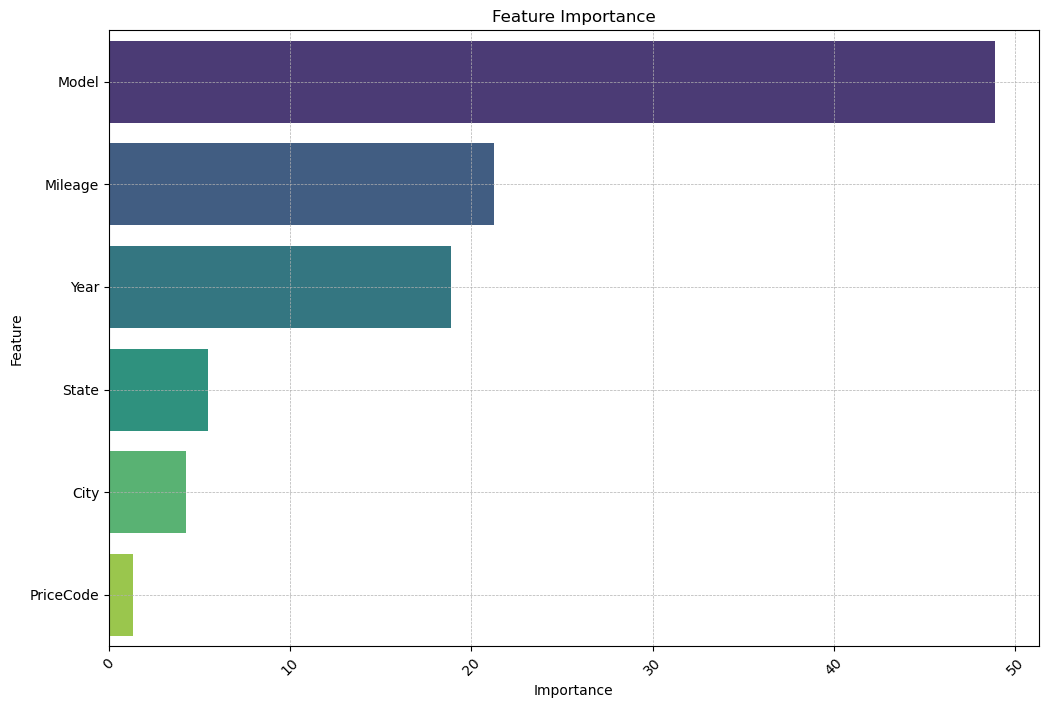

In [143]:
# Plot average mileage against price bands
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')

# Ensure the x-axis labels are displayed
plt.xticks(rotation=45)
plt.xlabel('Importance')
plt.ylabel('Feature')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add title
plt.title('Feature Importance')

plt.show()

# Model-2

In [144]:
Model_Info

,Model,Price,Main Category,Sub Category
0,GT2dr,314643.0,GT,2dr
1,F-150Raptor,70585.0,F-150,Raptor
2,MustangCobra,60332.0,Mustang,Cobra
3,MustangShelby,57370.0,Mustang,Shelby
4,F-150King,52791.0,F-150,King
...,...,...,...,...
142,Contour4dr,3468.0,Contour,4dr
143,Escort2dr,3464.0,Escort,2dr
144,ZX22dr,3449.0,ZX2,2dr
145,Explorer2dr,3381.0,Explorer,2dr


In [145]:
Supra_Category

,Main Category,Sub Category,Price,Supra Category
0,E-Series,['-'],36884.000,Truck
1,Super,['-'],35455.000,Truck
2,F-150,"['Raptor', 'King', 'Lariat', 'Limited', 'Plati...",31890.500,Truck
3,Mustang,"['Cobra', 'Shelby', 'GT', 'Fastback', 'EcoBoos...",30094.600,Sports Car
4,Expedition,"['Platinum', 'Limited', 'King', 'XLT', '-', '4...",22255.357,SUV
5,Transit,['-'],21759.000,Van
6,Flex,"['Limited', 'SEL', 'SE', '4dr']",20504.750,Family Car
7,Edge,"['Titanium', 'Sport', 'SEL', 'Limited', 'LTD',...",18812.889,SUV
8,Fusion,"['Sport', 'Platinum', '-', 'Titanium', 'Hybrid...",17834.111,Family Car
9,Explorer,"['Sport', '4WD', 'FWD', 'Limited', 'XLT', 'Bas...",17394.538,SUV


In [146]:
#Left Join the two tables:
merged_model_category = pd.merge(Model_Info, Supra_Category[['Main Category', 'Supra Category']], on='Main Category', how='left')

In [147]:
merged_model_category

,Model,Price,Main Category,Sub Category,Supra Category
0,GT2dr,314643.0,GT,2dr,NaN
1,F-150Raptor,70585.0,F-150,Raptor,Truck
2,MustangCobra,60332.0,Mustang,Cobra,Sports Car
3,MustangShelby,57370.0,Mustang,Shelby,Sports Car
4,F-150King,52791.0,F-150,King,Truck
...,...,...,...,...,...
142,Contour4dr,3468.0,Contour,4dr,Family Car
143,Escort2dr,3464.0,Escort,2dr,Family Car
144,ZX22dr,3449.0,ZX2,2dr,Sports Car
145,Explorer2dr,3381.0,Explorer,2dr,SUV


In [148]:
df

,Model,Price,Year,Mileage,City,State,Vin,PriceCode,Price_Band
0,FusionHybrid,18021,2020,22903.0,Fairfield,CA,FBA136F645B6F0A10,L,10k-20k
1,EscapeFWD,8953,2013,92616.0,Collinsville,IL,FB16ABDAA22090741,S,0-10k
2,EdgeSEL,23609,2017,34523.0,Bloomington,MN,F70109BACF9EFF043,D,20k-30k
3,FocusSedan,13762,2017,48969.0,Colorado Springs,CO,F8D81B18338DC83F7,Q,10k-20k
4,ExplorerFWD,36324,2020,17080.0,Olathe,KS,F469E0851D6FC8B21,C,30k-40k
...,...,...,...,...,...,...,...,...,...
110412,F-150King,53229,2020,3514.0,Bartow,FL,F7E3634548C2AF622,S,50k-60k
110413,F-1502WD,15768,2009,109628.0,Phoenix,AZ,F3C43B5825806F345,U,10k-20k
110414,FiestaSedan,13407,2018,18158.0,Puyallup,WA,FADCED8151A11C731,K,10k-20k
110415,Mustang2dr,12371,2014,83325.0,Rochester,NY,F572078DCEB318125,P,10k-20k


In [149]:
newdf = pd.merge(df, merged_model_category[['Model', 'Main Category', 'Sub Category', 'Supra Category']], on='Model', how='left')

In [150]:
newdf

,Model,Price,Year,Mileage,City,State,Vin,PriceCode,Price_Band,Main Category,Sub Category,Supra Category
0,FusionHybrid,18021,2020,22903.0,Fairfield,CA,FBA136F645B6F0A10,L,10k-20k,Fusion,Hybrid,Family Car
1,EscapeFWD,8953,2013,92616.0,Collinsville,IL,FB16ABDAA22090741,S,0-10k,Escape,FWD,SUV
2,EdgeSEL,23609,2017,34523.0,Bloomington,MN,F70109BACF9EFF043,D,20k-30k,Edge,SEL,SUV
3,FocusSedan,13762,2017,48969.0,Colorado Springs,CO,F8D81B18338DC83F7,Q,10k-20k,Focus,Sedan,Family Car
4,ExplorerFWD,36324,2020,17080.0,Olathe,KS,F469E0851D6FC8B21,C,30k-40k,Explorer,FWD,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...
108883,F-150King,53229,2020,3514.0,Bartow,FL,F7E3634548C2AF622,S,50k-60k,F-150,King,Truck
108884,F-1502WD,15768,2009,109628.0,Phoenix,AZ,F3C43B5825806F345,U,10k-20k,F-150,2WD,Truck
108885,FiestaSedan,13407,2018,18158.0,Puyallup,WA,FADCED8151A11C731,K,10k-20k,Fiesta,Sedan,Family Car
108886,Mustang2dr,12371,2014,83325.0,Rochester,NY,F572078DCEB318125,P,10k-20k,Mustang,2dr,Sports Car


In [151]:
newdf.isnull().sum()

Model             0
Price             0
Year              0
Mileage           0
City              0
State             0
Vin               0
PriceCode         0
Price_Band        0
Main Category     0
Sub Category      0
Supra Category    0
dtype: int64

In [152]:
Statistical_Model2 = newdf.drop(columns=['Price', 'Price_Band', 'Model'])

In [153]:
# Identify features and target

X = Statistical_Model2
y = newdf['Price']

# Identify categorical features
categorical_features = ['City', 'State', 'Vin', 'PriceCode', 'Main Category', 'Sub Category','Supra Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into CatBoost Pool format
train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool = Pool(X_test, y_test, cat_features=categorical_features)

# Initialize and train the CatBoost model
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, eval_metric='RMSE', verbose=200)
model.fit(train_pool, eval_set=test_pool)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

0:	learn: 9520.0707371	test: 9434.9400379	best: 9434.9400379 (0)	total: 49.1ms	remaining: 49s
200:	learn: 3305.3252377	test: 3502.6263897	best: 3502.6263897 (200)	total: 8.34s	remaining: 33.1s
400:	learn: 3067.9415062	test: 3478.7131336	best: 3478.7131336 (400)	total: 17.1s	remaining: 25.6s
600:	learn: 2885.6262065	test: 3475.7665372	best: 3474.4161910 (502)	total: 26s	remaining: 17.3s
800:	learn: 2724.1885055	test: 3474.6706721	best: 3473.3421941 (634)	total: 35.2s	remaining: 8.74s
999:	learn: 2577.5259247	test: 3479.6056165	best: 3473.3421941 (634)	total: 44.7s	remaining: 0us

bestTest = 3473.342194
bestIteration = 634

Shrink model to first 635 iterations.
MAE: 2324.435291462503
MSE: 12064105.997616792
R2: 0.8852058119389579


In [154]:
# Get feature importances
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
6,Main Category,24.170708
0,Year,20.863152
1,Mileage,18.655181
7,Sub Category,14.237288
8,Supra Category,9.959368
3,State,5.209399
2,City,4.890382
5,PriceCode,2.014523
4,Vin,0.000000


In [155]:
feature_importance_df.at[6, 'Feature'] = 'Model eg. Mustang, Focus'
feature_importance_df.at[7, 'Feature'] = 'Features eg. 4wd, SE'
feature_importance_df.at[8, 'Feature'] = 'Category eg. SUV, Truck'

feature_importance_df.round()

,Feature,Importance
6,"Model eg. Mustang, Focus",24.0
0,Year,21.0
1,Mileage,19.0
7,"Features eg. 4wd, SE",14.0
8,"Category eg. SUV, Truck",10.0
3,State,5.0
2,City,5.0
5,PriceCode,2.0
4,Vin,0.0


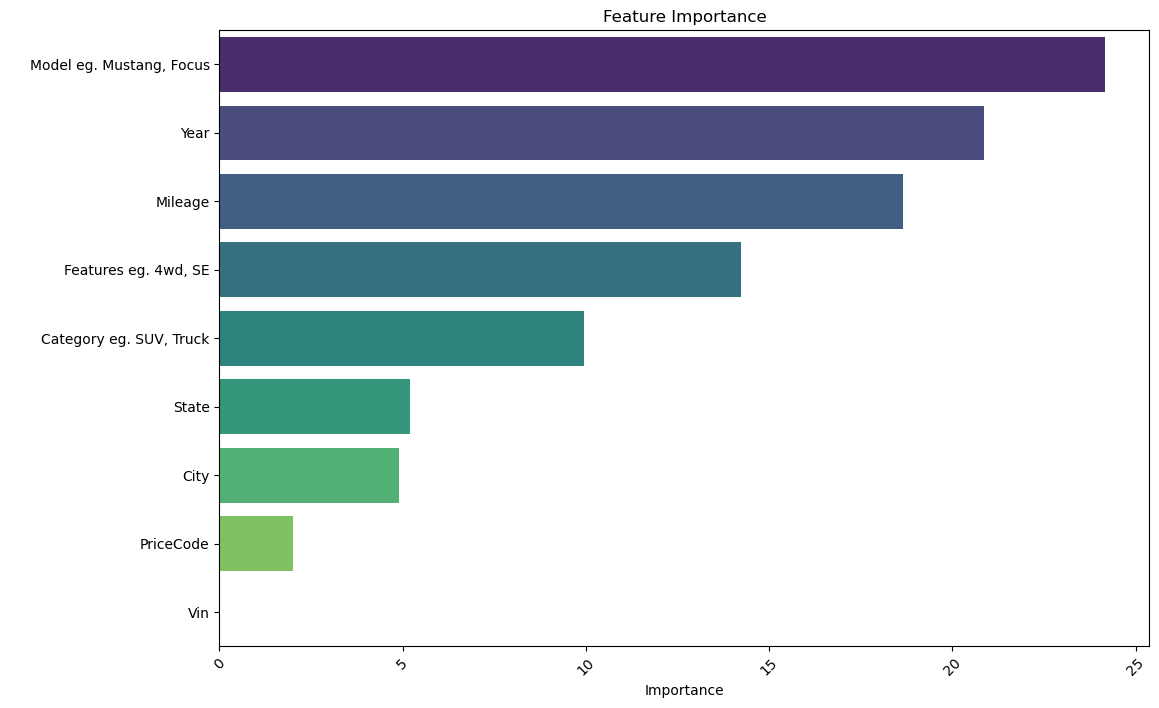

In [156]:
# Plot average mileage against price bands
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')

# Ensure the x-axis labels are displayed
plt.xticks(rotation=45)
plt.xlabel('Importance')
plt.ylabel(' ')

# Add title
plt.title('Feature Importance')

plt.show()

## Sum Sub Catergories

In [157]:
newdf.value_counts('Sub Category')

Sub Category
4WD            20587
-              13101
SE              9799
4dr             7872
2WD             6253
Sedan           5653
FWD             5642
XLT             4668
SEL             4652
Hatchback       4593
Titanium        4101
Limited         3502
2dr             2950
SuperCrew       2493
Fastback        2349
Convertible     1413
Coupe           1379
Sport           1312
S                908
Hybrid           905
EcoBoost         648
5dr              573
Base             530
SuperCab         511
GT               454
Lariat           262
SHO              261
XL               231
137"             172
AWD              161
5.4L             158
Platinum         153
Regular          152
RWD               97
119"              74
3dr               72
King              58
Shelby            46
V6                40
ST                33
4.6L              25
RS                23
XLS                5
FX4                4
Police             3
EL                 1
2010               1
